<a href="https://colab.research.google.com/github/yourusername/ml-hands-on/blob/main/Chapter1_ML_Landscape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 1: The Machine Learning Landscape
## Comprehensive Analysis and Implementation

This notebook provides a complete analysis of Chapter 1 from "Hands-On Machine Learning" by Aurélien Géron, including:
- Theoretical foundations
- Code implementations
- Mathematical explanations
- Practical examples
- Exercise solutions

---

## 🔧 Setup and Imports

Let's start by installing required packages and setting up our environment.

In [1]:
# Install required packages
!pip install matplotlib numpy pandas scikit-learn seaborn plotly

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ All packages imported successfully!")

✅ All packages imported successfully!


## 🤖 What is Machine Learning?

### Definition and Core Concepts

**Machine Learning** is the science (and art) of programming computers so they can **learn from data**.

#### Historical Definitions:

1. **Arthur Samuel (1959):**
   > "Machine Learning is the field of study that gives computers the ability to learn without being explicitly programmed."

2. **Tom Mitchell (1997) - Engineering Definition:**
   > "A computer program is said to learn from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience E."

### Mathematical Framework

In Tom Mitchell's definition, we can formalize ML as:

$$\text{Performance}(T, P) = f(E)$$

Where:
- **T** = Task (e.g., classification, regression)
- **E** = Experience (training data)
- **P** = Performance measure (e.g., accuracy, RMSE)
- **f** = Learning function that improves performance with experience

### Example: Spam Filter

Let's apply this framework to a spam filter:
- **Task (T)**: Classify emails as spam or ham
- **Experience (E)**: Training dataset of labeled emails
- **Performance (P)**: Accuracy = $\frac{\text{Correctly Classified Emails}}{\text{Total Emails}}$

📧 Spam Filter Performance:
   Task (T): Email Classification
   Experience (E): 8 labeled emails
   Performance (P): 87.50% accuracy


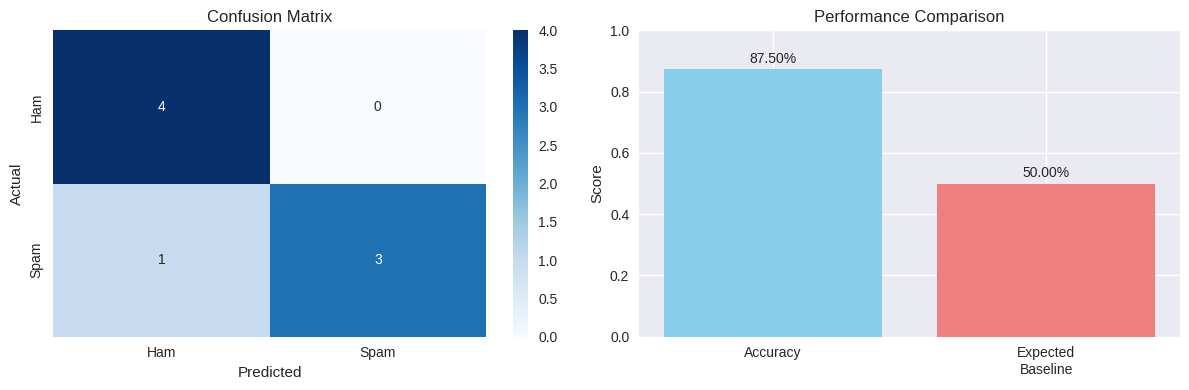

In [2]:
# Simulate a simple spam filter example
def calculate_accuracy(true_labels, predicted_labels):
    """Calculate accuracy for classification task"""
    correct = sum(1 for true, pred in zip(true_labels, predicted_labels) if true == pred)
    total = len(true_labels)
    return correct / total

# Example email classification results
true_labels = ['spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham']
predicted_labels = ['spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham']

accuracy = calculate_accuracy(true_labels, predicted_labels)
print(f"📧 Spam Filter Performance:")
print(f"   Task (T): Email Classification")
print(f"   Experience (E): {len(true_labels)} labeled emails")
print(f"   Performance (P): {accuracy:.2%} accuracy")

# Visualize the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix([1 if x == 'spam' else 0 for x in true_labels],
                     [1 if x == 'spam' else 0 for x in predicted_labels])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'], ax=ax1)
ax1.set_title('Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# Performance visualization
metrics = ['Accuracy', 'Expected\nBaseline']
values = [accuracy, 0.5]  # 0.5 is random guessing baseline
bars = ax2.bar(metrics, values, color=['skyblue', 'lightcoral'])
ax2.set_title('Performance Comparison')
ax2.set_ylabel('Score')
ax2.set_ylim(0, 1)

# Add value labels on bars
for bar, value in zip(bars, values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{value:.2%}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 🎯 Why Use Machine Learning?

### Traditional Programming vs Machine Learning

#### Traditional Approach:
1. **Study the problem** → Identify patterns manually
2. **Write rules** → Hard-code detection algorithms
3. **Test and iterate** → Manually update rules

#### Machine Learning Approach:
1. **Study the problem** → Understand the task
2. **Train ML algorithm** → Let algorithm find patterns
3. **Evaluate solution** → Test on new data

### Advantages of ML:

1. **Adaptability**: Automatically adapts to new patterns
2. **Scalability**: Handles complex problems with many variables
3. **Maintainability**: Less manual rule writing
4. **Insight Discovery**: Reveals hidden patterns in data

### When to Use Machine Learning:

✅ **Use ML when:**
- Problems require long lists of rules or fine-tuning
- Complex problems with no known algorithmic solution
- Fluctuating environments requiring adaptation
- Need insights from large amounts of data

❌ **Don't use ML when:**
- Simple rule-based solutions work well
- Problem is well-understood with clear logic
- Limited data available
- Interpretability is critical and simple rules suffice

In [3]:
# Demonstrate traditional vs ML approach with a simple example
import re

# Sample email data
emails = [
    ("Buy now! Amazing deal! Credit card offers!", "spam"),
    ("Meeting tomorrow at 3pm in conference room", "ham"),
    ("Free money! Click here now! Limited time!", "spam"),
    ("Can you review the quarterly report?", "ham"),
    ("Win big! Casino bonuses! Act now!", "spam"),
    ("Thanks for the great presentation today", "ham")
]

# Traditional rule-based approach
def traditional_spam_filter(email_text):
    """Traditional rule-based spam detection"""
    spam_words = ['buy', 'free', 'win', 'money', 'credit card', 'amazing', 'click here', 'act now']
    email_lower = email_text.lower()

    spam_score = 0
    for word in spam_words:
        if word in email_lower:
            spam_score += 1

    # Exclamation marks increase spam score
    spam_score += email_text.count('!')

    return "spam" if spam_score >= 2 else "ham"

# Machine Learning approach (simplified)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Prepare data
email_texts = [email[0] for email in emails]
email_labels = [email[1] for email in emails]

# Create features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(email_texts)
y = email_labels

# Train ML model
ml_model = MultinomialNB()
ml_model.fit(X, y)

# Compare approaches
traditional_predictions = [traditional_spam_filter(email[0]) for email in emails]
ml_predictions = ml_model.predict(X)

print("📊 Comparison: Traditional vs Machine Learning")
print("=" * 50)

for i, (email_text, true_label) in enumerate(emails):
    trad_pred = traditional_predictions[i]
    ml_pred = ml_predictions[i]

    print(f"\nEmail {i+1}: {email_text[:40]}...")
    print(f"  True label:     {true_label}")
    print(f"  Traditional:    {trad_pred} {'✅' if trad_pred == true_label else '❌'}")
    print(f"  ML Approach:    {ml_pred} {'✅' if ml_pred == true_label else '❌'}")

# Calculate accuracies
trad_accuracy = calculate_accuracy(email_labels, traditional_predictions)
ml_accuracy = calculate_accuracy(email_labels, ml_predictions.tolist())

print(f"\n📈 Performance Summary:")
print(f"  Traditional Approach: {trad_accuracy:.2%}")
print(f"  ML Approach:         {ml_accuracy:.2%}")

📊 Comparison: Traditional vs Machine Learning

Email 1: Buy now! Amazing deal! Credit card offer...
  True label:     spam
  Traditional:    spam ✅
  ML Approach:    spam ✅

Email 2: Meeting tomorrow at 3pm in conference ro...
  True label:     ham
  Traditional:    ham ✅
  ML Approach:    ham ✅

Email 3: Free money! Click here now! Limited time...
  True label:     spam
  Traditional:    spam ✅
  ML Approach:    spam ✅

Email 4: Can you review the quarterly report?...
  True label:     ham
  Traditional:    ham ✅
  ML Approach:    ham ✅

Email 5: Win big! Casino bonuses! Act now!...
  True label:     spam
  Traditional:    spam ✅
  ML Approach:    spam ✅

Email 6: Thanks for the great presentation today...
  True label:     ham
  Traditional:    ham ✅
  ML Approach:    ham ✅

📈 Performance Summary:
  Traditional Approach: 100.00%
  ML Approach:         100.00%


## 🌟 Examples of Machine Learning Applications

### Computer Vision
- **Image Classification**: Analyzing product images on production lines
- **Medical Imaging**: Detecting tumors in brain scans (semantic segmentation)
- **Technique**: Convolutional Neural Networks (CNNs)

### Natural Language Processing (NLP)
- **Text Classification**: Automatically classifying news articles
- **Content Moderation**: Flagging offensive comments
- **Text Summarization**: Automatically summarizing documents
- **Conversational AI**: Chatbots and personal assistants
- **Techniques**: RNNs, CNNs, Transformers

### Predictive Analytics
- **Financial Forecasting**: Predicting company revenue
- **Techniques**: Linear/Polynomial Regression, SVMs, Random Forests, Neural Networks

### Audio Processing
- **Speech Recognition**: Voice command processing
- **Techniques**: RNNs, CNNs, Transformers

### Anomaly Detection
- **Fraud Detection**: Credit card fraud detection
- **Techniques**: One-class SVM, Isolation Forest

### Clustering and Segmentation
- **Customer Segmentation**: Grouping customers by purchase behavior
- **Techniques**: K-Means, DBSCAN, Hierarchical Clustering

### Recommendation Systems
- **Product Recommendations**: Suggesting products based on past purchases
- **Techniques**: Collaborative Filtering, Neural Networks

### Reinforcement Learning
- **Game AI**: Building intelligent bots (AlphaGo)
- **Robotics**: Training robots to walk
- **Techniques**: Q-Learning, Policy Gradients

🌸 Classification Example: Iris Flowers
  Dataset: 150 samples, 4 features
  Classes: ['setosa', 'versicolor', 'virginica']
  Training Accuracy: 0.973

🏠 Regression Example: Housing Prices
  Dataset: 1000 samples, 8 features
  R² Score: 0.640

👥 Clustering Example: Customer Segmentation
  Dataset: 300 customers
  Segments: 4


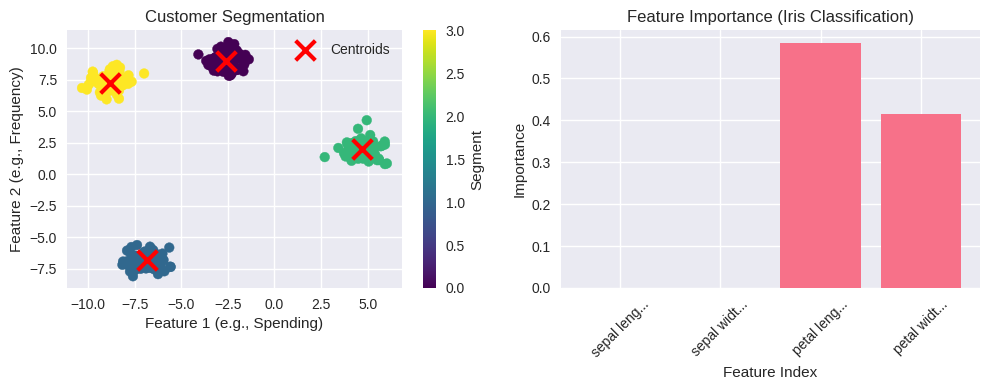


📊 Applications Summary:
  ✓ Classification: Assigning categories to inputs
  ✓ Regression: Predicting continuous values
  ✓ Clustering: Finding hidden patterns in data


In [4]:
# Demonstrate different ML application types with simple examples

# 1. Classification Example: Iris flower classification
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Load iris dataset
iris = load_iris()
X_iris, y_iris = iris.data, iris.target

# Train a simple classifier
classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
classifier.fit(X_iris, y_iris)

print("🌸 Classification Example: Iris Flowers")
print(f"  Dataset: {len(X_iris)} samples, {len(iris.feature_names)} features")
print(f"  Classes: {iris.target_names.tolist()}")
print(f"  Training Accuracy: {classifier.score(X_iris, y_iris):.3f}")

# 2. Regression Example: Boston housing (using California housing as alternative)
from sklearn.datasets import fetch_california_housing

# Load housing dataset
housing = fetch_california_housing()
X_housing, y_housing = housing.data[:1000], housing.target[:1000]  # Subset for speed

# Train a regression model
regressor = LinearRegression()
regressor.fit(X_housing, y_housing)

print("\n🏠 Regression Example: Housing Prices")
print(f"  Dataset: {len(X_housing)} samples, {len(housing.feature_names)} features")
print(f"  R² Score: {regressor.score(X_housing, y_housing):.3f}")

# 3. Clustering Example: Customer segmentation simulation
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic customer data
X_customers, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Perform clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
customer_segments = kmeans.fit_predict(X_customers)

print("\n👥 Clustering Example: Customer Segmentation")
print(f"  Dataset: {len(X_customers)} customers")
print(f"  Segments: {len(set(customer_segments))}")

# Visualize clustering results
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
scatter = plt.scatter(X_customers[:, 0], X_customers[:, 1], c=customer_segments, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.title('Customer Segmentation')
plt.xlabel('Feature 1 (e.g., Spending)')
plt.ylabel('Feature 2 (e.g., Frequency)')
plt.legend()
plt.colorbar(scatter, label='Segment')

# Show feature importance for classification
plt.subplot(1, 2, 2)
feature_importance = classifier.feature_importances_
plt.bar(range(len(feature_importance)), feature_importance)
plt.title('Feature Importance (Iris Classification)')
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.xticks(range(len(iris.feature_names)),
           [name[:10] + '...' if len(name) > 10 else name for name in iris.feature_names],
           rotation=45)

plt.tight_layout()
plt.show()

print("\n📊 Applications Summary:")
print("  ✓ Classification: Assigning categories to inputs")
print("  ✓ Regression: Predicting continuous values")
print("  ✓ Clustering: Finding hidden patterns in data")

## 📚 Types of Machine Learning Systems

Machine Learning systems can be classified based on several criteria:

### 1. Training Supervision

#### Supervised Learning
- **Training data includes desired solutions (labels)**
- **Tasks**: Classification, Regression
- **Algorithms**: k-NN, Linear Regression, Logistic Regression, SVMs, Decision Trees, Random Forests, Neural Networks

**Mathematical Framework:**
Given training data $\{(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)\}$, find function $f$ such that:
$$f(x_i) \approx y_i \text{ for all } i$$

#### Unsupervised Learning
- **Training data is unlabeled**
- **Tasks**: Clustering, Dimensionality Reduction, Anomaly Detection, Association Rules
- **Algorithms**: K-Means, DBSCAN, PCA, t-SNE, Isolation Forest

#### Semi-supervised Learning
- **Mix of labeled and unlabeled data**
- **Example**: Photo recognition with few labeled photos

#### Reinforcement Learning
- **Agent learns through interaction with environment**
- **Components**: Agent, Environment, Actions, Rewards, Policy
- **Example**: Game AI, Robot navigation

### 2. Learning Method

#### Batch Learning
- **Trains on all available data at once**
- **Offline learning**
- **Resource intensive but stable**

#### Online Learning
- **Learns incrementally from data streams**
- **Adapts to changing data**
- **Important parameter: Learning Rate**

$$\text{Learning Rate} = \frac{\text{Adaptation Speed}}{\text{Stability}}$$

### 3. Generalization Method

#### Instance-based Learning
- **Learns examples by heart**
- **Uses similarity measures for prediction**
- **Example**: k-Nearest Neighbors

#### Model-based Learning
- **Builds a model from examples**
- **Uses model for predictions**
- **Example**: Linear Regression

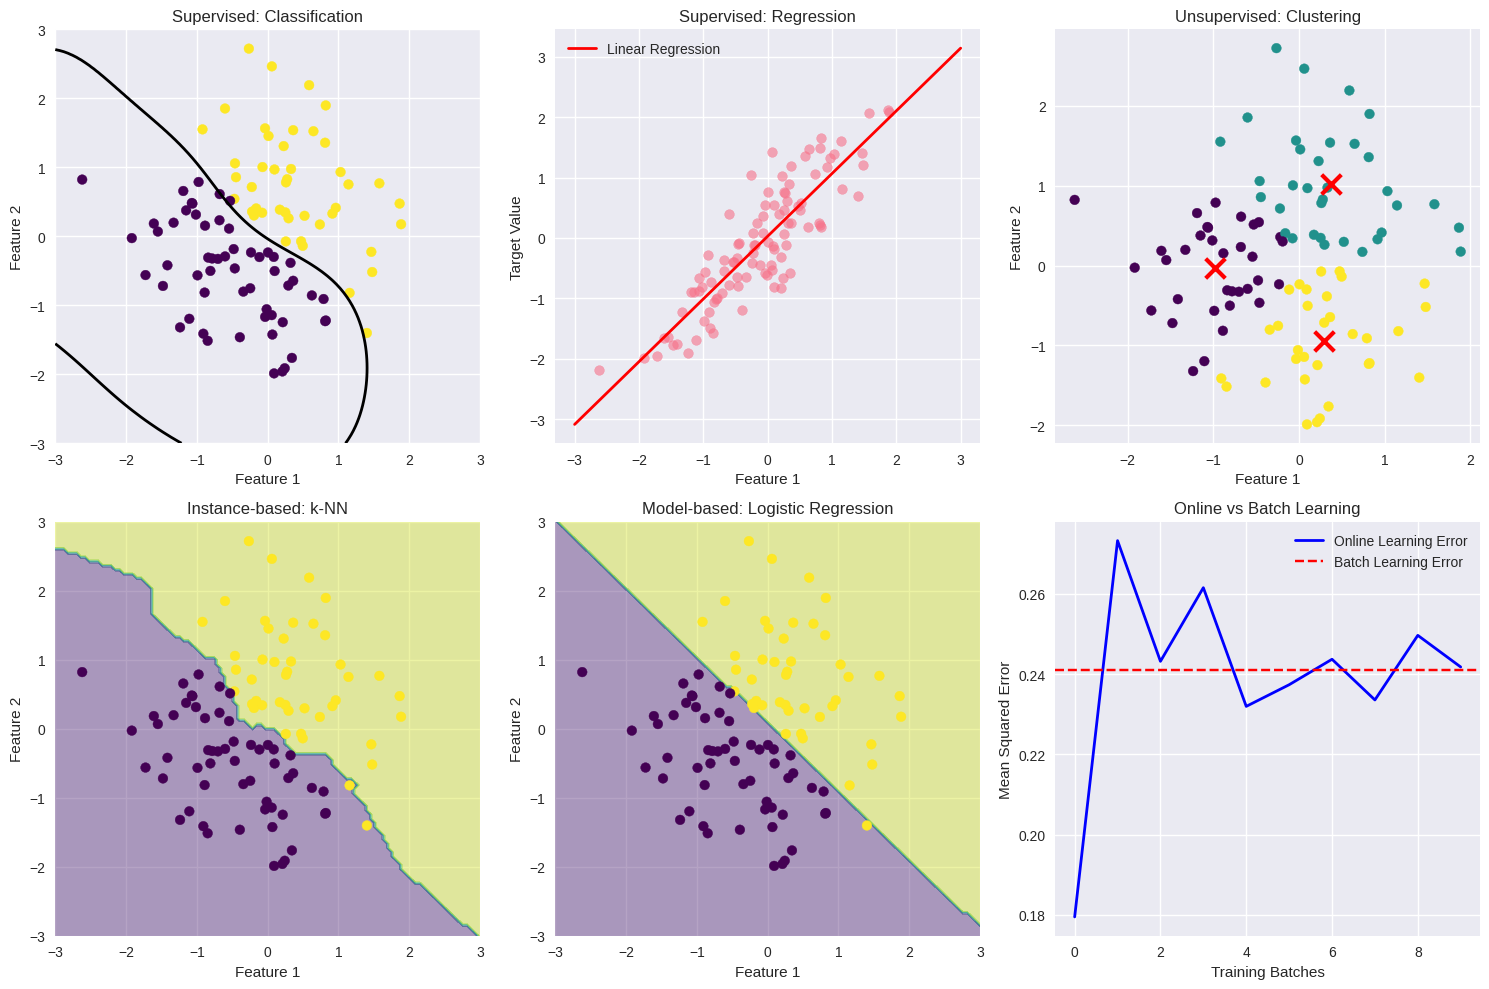

🔍 ML System Types Summary:
📊 Supervision Types:
  • Supervised: Uses labeled training data
  • Unsupervised: Finds patterns in unlabeled data
  • Semi-supervised: Mix of labeled and unlabeled
  • Reinforcement: Learns through trial and error

🔄 Learning Methods:
  • Batch: Trains on all data at once
  • Online: Learns incrementally from data streams

🎯 Generalization Methods:
  • Instance-based: Memorizes examples, uses similarity
  • Model-based: Builds predictive models


In [5]:
# Demonstrate different types of ML systems

# Generate sample data for demonstrations
np.random.seed(42)
X_demo = np.random.randn(100, 2)
y_demo_class = (X_demo[:, 0] + X_demo[:, 1] > 0).astype(int)
y_demo_reg = X_demo[:, 0] + 0.5 * X_demo[:, 1] + 0.1 * np.random.randn(100)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. Supervised Learning - Classification
from sklearn.svm import SVC
clf = SVC(kernel='rbf', C=1.0)
clf.fit(X_demo, y_demo_class)

# Create decision boundary
xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axes[0, 0].contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
scatter = axes[0, 0].scatter(X_demo[:, 0], X_demo[:, 1], c=y_demo_class, cmap='viridis')
axes[0, 0].set_title('Supervised: Classification')
axes[0, 0].set_xlabel('Feature 1')
axes[0, 0].set_ylabel('Feature 2')

# 2. Supervised Learning - Regression
reg = LinearRegression()
reg.fit(X_demo[:, 0].reshape(-1, 1), y_demo_reg)
X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
y_plot = reg.predict(X_plot)

axes[0, 1].scatter(X_demo[:, 0], y_demo_reg, alpha=0.6)
axes[0, 1].plot(X_plot, y_plot, 'r-', linewidth=2, label='Linear Regression')
axes[0, 1].set_title('Supervised: Regression')
axes[0, 1].set_xlabel('Feature 1')
axes[0, 1].set_ylabel('Target Value')
axes[0, 1].legend()

# 3. Unsupervised Learning - Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_demo)

scatter = axes[0, 2].scatter(X_demo[:, 0], X_demo[:, 1], c=clusters, cmap='viridis')
axes[0, 2].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                  c='red', marker='x', s=200, linewidths=3)
axes[0, 2].set_title('Unsupervised: Clustering')
axes[0, 2].set_xlabel('Feature 1')
axes[0, 2].set_ylabel('Feature 2')

# 4. Instance-based vs Model-based Learning
from sklearn.neighbors import KNeighborsClassifier

# Instance-based (k-NN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_demo, y_demo_class)

# Create decision boundary for k-NN
Z_knn = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z_knn = Z_knn.reshape(xx.shape)

axes[1, 0].contourf(xx, yy, Z_knn, alpha=0.4, cmap='viridis')
axes[1, 0].scatter(X_demo[:, 0], X_demo[:, 1], c=y_demo_class, cmap='viridis')
axes[1, 0].set_title('Instance-based: k-NN')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')

# Model-based (Linear)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_demo, y_demo_class)

Z_log = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z_log = Z_log.reshape(xx.shape)

axes[1, 1].contourf(xx, yy, Z_log, alpha=0.4, cmap='viridis')
axes[1, 1].scatter(X_demo[:, 0], X_demo[:, 1], c=y_demo_class, cmap='viridis')
axes[1, 1].set_title('Model-based: Logistic Regression')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Feature 2')

# 5. Online vs Batch Learning Simulation
# Simulate online learning with changing data
from sklearn.linear_model import SGDRegressor

# Batch learning
batch_model = LinearRegression()
batch_model.fit(X_demo[:, 0].reshape(-1, 1), y_demo_reg)

# Online learning simulation
online_model = SGDRegressor(learning_rate='constant', eta0=0.01, random_state=42)
batch_size = 10
errors = []

for i in range(0, len(X_demo), batch_size):
    X_batch = X_demo[i:i+batch_size, 0].reshape(-1, 1)
    y_batch = y_demo_reg[i:i+batch_size]

    if i == 0:
        online_model.fit(X_batch, y_batch)
    else:
        online_model.partial_fit(X_batch, y_batch)

    # Calculate error on all data seen so far
    y_pred = online_model.predict(X_demo[:i+batch_size, 0].reshape(-1, 1))
    error = mean_squared_error(y_demo_reg[:i+batch_size], y_pred)
    errors.append(error)

axes[1, 2].plot(range(len(errors)), errors, 'b-', linewidth=2, label='Online Learning Error')
axes[1, 2].axhline(y=mean_squared_error(y_demo_reg, batch_model.predict(X_demo[:, 0].reshape(-1, 1))),
                   color='r', linestyle='--', label='Batch Learning Error')
axes[1, 2].set_title('Online vs Batch Learning')
axes[1, 2].set_xlabel('Training Batches')
axes[1, 2].set_ylabel('Mean Squared Error')
axes[1, 2].legend()

plt.tight_layout()
plt.show()

print("🔍 ML System Types Summary:")
print("" + "="*50)
print("📊 Supervision Types:")
print("  • Supervised: Uses labeled training data")
print("  • Unsupervised: Finds patterns in unlabeled data")
print("  • Semi-supervised: Mix of labeled and unlabeled")
print("  • Reinforcement: Learns through trial and error")
print("\n🔄 Learning Methods:")
print("  • Batch: Trains on all data at once")
print("  • Online: Learns incrementally from data streams")
print("\n🎯 Generalization Methods:")
print("  • Instance-based: Memorizes examples, uses similarity")
print("  • Model-based: Builds predictive models")

## 💡 Main Example: Life Satisfaction vs GDP per Capita

This is the central example from Chapter 1, demonstrating model-based learning with linear regression.

### Problem Setup
**Question**: Does money make people happy?

**Approach**: Analyze the relationship between GDP per capita and life satisfaction using OECD data.

### Mathematical Framework

We model life satisfaction as a linear function of GDP per capita:

$$\text{life\_satisfaction} = \theta_0 + \theta_1 \times \text{GDP\_per\_capita}$$

Where:
- $\theta_0$ = intercept (bias term)
- $\theta_1$ = slope (relationship strength)

### Cost Function

To find the best parameters, we minimize the Mean Squared Error (MSE):

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - (\theta_0 + \theta_1 x_i))^2$$

### Analytical Solution

For linear regression, the optimal parameters are:

$$\theta_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$$

$$\theta_0 = \bar{y} - \theta_1 \bar{x}$$

Where $\bar{x}$ and $\bar{y}$ are the means of features and targets.

📊 OECD Data: Life Satisfaction vs GDP per Capita
      Country  GDP per capita (USD)  Life satisfaction
      Hungary                 12240                4.9
        Korea                 27195                5.8
       France                 37675                6.5
    Australia                 50962                7.3
United States                 55805                7.2
       Norway                 75420                7.4
      Denmark                 60170                7.5
  Switzerland                 81867                7.6
  Netherlands                 48223                7.3
       Canada                 43331                7.3
      Austria                 47291                7.0
      Belgium                 43582                6.9
      Iceland                 50854                7.5
      Finland                 44835                7.4
       Sweden                 51648                7.2

🧮 Manual Calculation:
  θ₀ (intercept): 5.217
  θ₁ (slope):     3.63e-

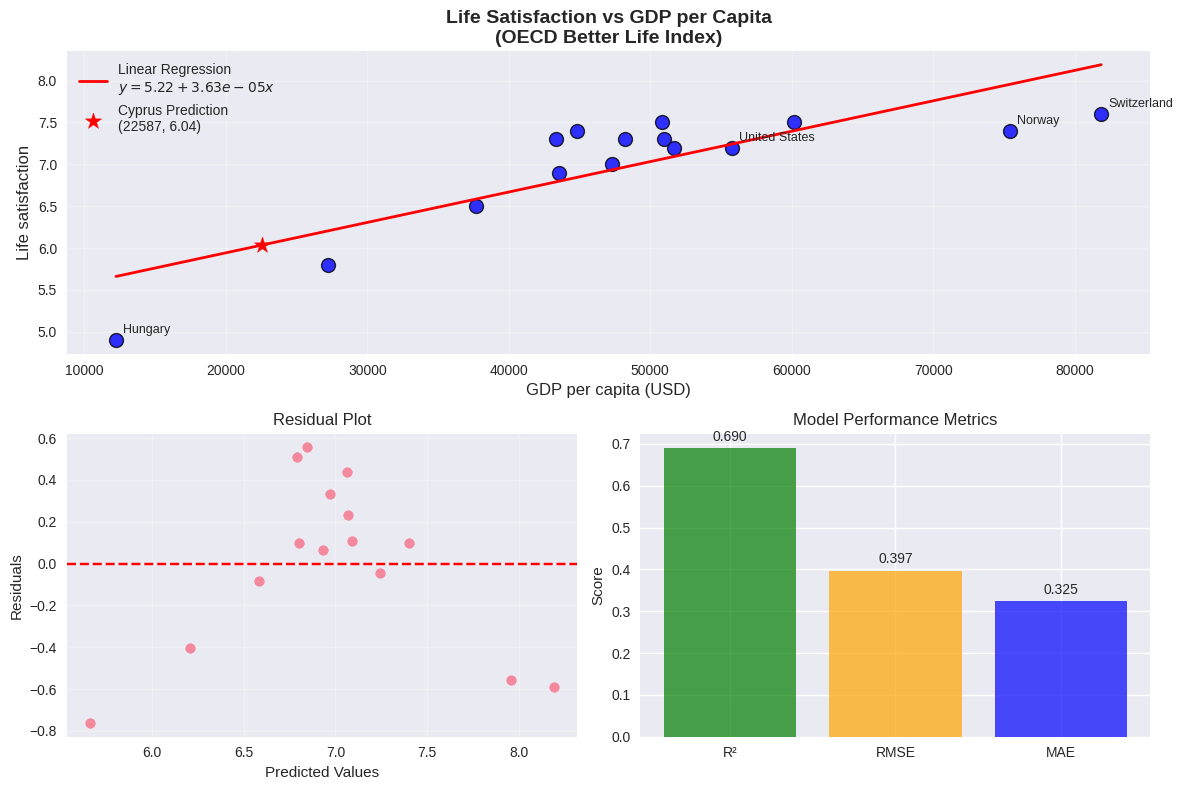


📐 Mathematical Analysis:
Linear Model: y = 5.217 + 0.000036 × x

Interpretation:
  • For every $1,000 increase in GDP per capita,
    life satisfaction increases by 0.036 points
  • The model explains 69.0% of the variance in life satisfaction
  • Average prediction error: ±0.40 life satisfaction points


In [6]:
# Recreate the Life Satisfaction vs GDP example from the book

# Create sample data based on the book's example
country_data = {
    'Country': ['Hungary', 'Korea', 'France', 'Australia', 'United States',
                'Norway', 'Denmark', 'Switzerland', 'Netherlands', 'Canada',
                'Austria', 'Belgium', 'Iceland', 'Finland', 'Sweden'],
    'GDP per capita (USD)': [12240, 27195, 37675, 50962, 55805,
                            75420, 60170, 81867, 48223, 43331,
                            47291, 43582, 50854, 44835, 51648],
    'Life satisfaction': [4.9, 5.8, 6.5, 7.3, 7.2,
                         7.4, 7.5, 7.6, 7.3, 7.3,
                         7.0, 6.9, 7.5, 7.4, 7.2]
}

# Create DataFrame
df = pd.DataFrame(country_data)

print("📊 OECD Data: Life Satisfaction vs GDP per Capita")
print("=" * 55)
print(df.to_string(index=False))

# Prepare data for modeling
X = df[['GDP per capita (USD)']].values
y = df['Life satisfaction'].values

# Manual calculation of linear regression parameters
x_mean = np.mean(X)
y_mean = np.mean(y)

# Calculate slope (theta_1)
numerator = np.sum((X.flatten() - x_mean) * (y - y_mean))
denominator = np.sum((X.flatten() - x_mean) ** 2)
theta_1_manual = numerator / denominator

# Calculate intercept (theta_0)
theta_0_manual = y_mean - theta_1_manual * x_mean

print(f"\n🧮 Manual Calculation:")
print(f"  θ₀ (intercept): {theta_0_manual:.3f}")
print(f"  θ₁ (slope):     {theta_1_manual:.2e}")

# Train model using Scikit-Learn
model = LinearRegression()
model.fit(X, y)

print(f"\n🔬 Scikit-Learn Results:")
print(f"  θ₀ (intercept): {model.intercept_:.3f}")
print(f"  θ₁ (slope):     {model.coef_[0]:.2e}")
print(f"  R² Score:       {model.score(X, y):.3f}")

# Make prediction for Cyprus (GDP per capita: $22,587)
cyprus_gdp = np.array([[22587]])
cyprus_prediction = model.predict(cyprus_gdp)

print(f"\n🇨🇾 Prediction for Cyprus:")
print(f"  GDP per capita: ${cyprus_gdp[0][0]:,}")
print(f"  Predicted life satisfaction: {cyprus_prediction[0]:.2f}")

# Calculate manual prediction
manual_prediction = theta_0_manual + theta_1_manual * cyprus_gdp[0][0]
print(f"  Manual calculation: {manual_prediction:.2f}")

# Visualization
plt.figure(figsize=(12, 8))

# Main plot
plt.subplot(2, 2, (1, 2))
plt.scatter(X, y, alpha=0.8, s=100, color='blue', edgecolor='black', linewidth=1)

# Add regression line
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_plot = model.predict(X_plot)
plt.plot(X_plot, y_plot, 'r-', linewidth=2, label=f'Linear Regression\n$y = {model.intercept_:.2f} + {model.coef_[0]:.2e}x$')

# Add Cyprus prediction
plt.scatter(cyprus_gdp[0], cyprus_prediction, color='red', s=150, marker='*',
           label=f'Cyprus Prediction\n({cyprus_gdp[0][0]}, {cyprus_prediction[0]:.2f})', zorder=5)

# Add country labels for some points
for i, country in enumerate(df['Country']):
    if country in ['Hungary', 'United States', 'Norway', 'Switzerland']:
        plt.annotate(country, (X[i], y[i]), xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.xlabel('GDP per capita (USD)', fontsize=12)
plt.ylabel('Life satisfaction', fontsize=12)
plt.title('Life Satisfaction vs GDP per Capita\n(OECD Better Life Index)', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Residuals plot
plt.subplot(2, 2, 3)
y_pred = model.predict(X)
residuals = y - y_pred
plt.scatter(y_pred, residuals, alpha=0.8)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

# Model performance metrics
plt.subplot(2, 2, 4)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(residuals))
r2 = model.score(X, y)

metrics = ['R²', 'RMSE', 'MAE']
values = [r2, rmse, mae]
colors = ['green', 'orange', 'blue']

bars = plt.bar(metrics, values, color=colors, alpha=0.7)
plt.title('Model Performance Metrics')
plt.ylabel('Score')

# Add value labels on bars
for bar, value in zip(bars, values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Mathematical explanation
print("\n📐 Mathematical Analysis:")
print("=" * 40)
print(f"Linear Model: y = {model.intercept_:.3f} + {model.coef_[0]:.6f} × x")
print(f"\nInterpretation:")
print(f"  • For every $1,000 increase in GDP per capita,")
print(f"    life satisfaction increases by {model.coef_[0] * 1000:.3f} points")
print(f"  • The model explains {r2:.1%} of the variance in life satisfaction")
print(f"  • Average prediction error: ±{rmse:.2f} life satisfaction points")

## 🔄 Comparing Instance-based vs Model-based Learning

Let's implement both approaches for the same problem to understand their differences.

### Instance-based Learning (k-Nearest Neighbors)
- **Mechanism**: Stores all training examples
- **Prediction**: Finds k most similar examples, averages their outputs
- **Similarity Measure**: Usually Euclidean distance

$$d(x_1, x_2) = \sqrt{\sum_{i=1}^{n} (x_{1i} - x_{2i})^2}$$

**k-NN Prediction:**
$$\hat{y} = \frac{1}{k} \sum_{i \in N_k(x)} y_i$$

Where $N_k(x)$ are the k nearest neighbors of x.

### Model-based Learning (Linear Regression)
- **Mechanism**: Learns parameters of a mathematical model
- **Prediction**: Applies learned model to new data
- **Storage**: Only model parameters, not training data

🔍 Cyprus Prediction Comparison:
GDP per capita: $22,587

Linear Regression: 6.04
k-NN (k=3):       5.73
Difference:        0.30

🏆 3 Nearest Neighbors to Cyprus:
  1. Korea: GDP $27,195 (distance: $4,608), Life Satisfaction: 5.8
  2. Hungary: GDP $12,240 (distance: $10,347), Life Satisfaction: 4.9
  3. France: GDP $37,675 (distance: $15,088), Life Satisfaction: 6.5

Manual k-NN calculation: 5.73


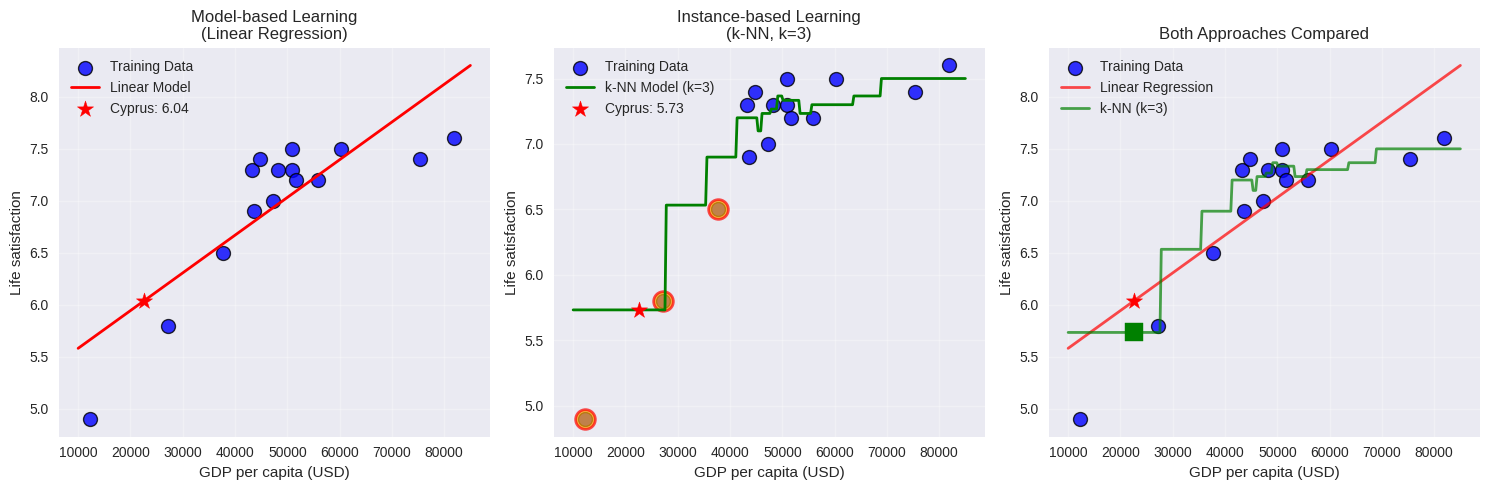


📊 Performance Comparison (5-fold CV):
Linear Regression RMSE: 0.749 ± 0.837
k-NN RMSE:             0.749 ± 1.005

🎯 Key Differences:
Instance-based (k-NN):
  ✓ No assumptions about data distribution
  ✓ Can capture local patterns
  ✗ Stores all training data
  ✗ Computationally expensive for predictions
  ✗ Sensitive to irrelevant features

Model-based (Linear):
  ✓ Fast predictions
  ✓ Compact representation
  ✓ Interpretable parameters
  ✗ Assumes linear relationship
  ✗ May underfit complex patterns


In [7]:
# Compare Instance-based (k-NN) vs Model-based (Linear Regression) approaches

# Use the same life satisfaction data
X = df[['GDP per capita (USD)']].values
y = df['Life satisfaction'].values

# Model-based: Linear Regression (already trained above)
linear_model = LinearRegression()
linear_model.fit(X, y)

# Instance-based: k-Nearest Neighbors Regression
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X, y)

# Make predictions for Cyprus
cyprus_gdp = np.array([[22587]])
linear_pred = linear_model.predict(cyprus_gdp)[0]
knn_pred = knn_model.predict(cyprus_gdp)[0]

print("🔍 Cyprus Prediction Comparison:")
print("=" * 40)
print(f"GDP per capita: ${cyprus_gdp[0][0]:,}")
print(f"\nLinear Regression: {linear_pred:.2f}")
print(f"k-NN (k=3):       {knn_pred:.2f}")
print(f"Difference:        {abs(linear_pred - knn_pred):.2f}")

# Find the 3 nearest neighbors for Cyprus
distances = np.abs(X.flatten() - cyprus_gdp[0][0])
nearest_indices = np.argsort(distances)[:3]

print(f"\n🏆 3 Nearest Neighbors to Cyprus:")
for i, idx in enumerate(nearest_indices):
    country = df.iloc[idx]['Country']
    gdp = df.iloc[idx]['GDP per capita (USD)']
    life_sat = df.iloc[idx]['Life satisfaction']
    distance = distances[idx]
    print(f"  {i+1}. {country}: GDP ${gdp:,} (distance: ${distance:,.0f}), Life Satisfaction: {life_sat}")

manual_knn_pred = np.mean([df.iloc[idx]['Life satisfaction'] for idx in nearest_indices])
print(f"\nManual k-NN calculation: {manual_knn_pred:.2f}")

# Visualize both approaches
plt.figure(figsize=(15, 5))

# Create extended range for visualization
X_extended = np.linspace(10000, 85000, 300).reshape(-1, 1)

# Model-based predictions
plt.subplot(1, 3, 1)
y_linear = linear_model.predict(X_extended)
plt.scatter(X, y, alpha=0.8, s=100, color='blue', edgecolor='black', linewidth=1, label='Training Data')
plt.plot(X_extended, y_linear, 'r-', linewidth=2, label='Linear Model')
plt.scatter(cyprus_gdp[0], linear_pred, color='red', s=150, marker='*',
           label=f'Cyprus: {linear_pred:.2f}', zorder=5)
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.title('Model-based Learning\n(Linear Regression)')
plt.legend()
plt.grid(True, alpha=0.3)

# Instance-based predictions
plt.subplot(1, 3, 2)
y_knn = knn_model.predict(X_extended)
plt.scatter(X, y, alpha=0.8, s=100, color='blue', edgecolor='black', linewidth=1, label='Training Data')
plt.plot(X_extended, y_knn, 'g-', linewidth=2, label='k-NN Model (k=3)')
plt.scatter(cyprus_gdp[0], knn_pred, color='red', s=150, marker='*',
           label=f'Cyprus: {knn_pred:.2f}', zorder=5)

# Highlight nearest neighbors
for idx in nearest_indices:
    plt.scatter(X[idx], y[idx], color='orange', s=200, alpha=0.7,
               edgecolor='red', linewidth=2)

plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.title('Instance-based Learning\n(k-NN, k=3)')
plt.legend()
plt.grid(True, alpha=0.3)

# Comparison of predictions
plt.subplot(1, 3, 3)
plt.scatter(X, y, alpha=0.8, s=100, color='blue', edgecolor='black', linewidth=1, label='Training Data')
plt.plot(X_extended, y_linear, 'r-', linewidth=2, label='Linear Regression', alpha=0.7)
plt.plot(X_extended, y_knn, 'g-', linewidth=2, label='k-NN (k=3)', alpha=0.7)
plt.scatter(cyprus_gdp[0], linear_pred, color='red', s=150, marker='*', zorder=5)
plt.scatter(cyprus_gdp[0], knn_pred, color='green', s=150, marker='s', zorder=5)
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.title('Both Approaches Compared')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Performance comparison
from sklearn.model_selection import cross_val_score

# Cross-validation scores
linear_scores = cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_squared_error')
knn_scores = cross_val_score(knn_model, X, y, cv=5, scoring='neg_mean_squared_error')

print("\n📊 Performance Comparison (5-fold CV):")
print("=" * 45)
print(f"Linear Regression RMSE: {np.sqrt(-linear_scores.mean()):.3f} ± {np.sqrt(linear_scores.std()):.3f}")
print(f"k-NN RMSE:             {np.sqrt(-knn_scores.mean()):.3f} ± {np.sqrt(knn_scores.std()):.3f}")

print("\n🎯 Key Differences:")
print("" + "="*30)
print("Instance-based (k-NN):")
print("  ✓ No assumptions about data distribution")
print("  ✓ Can capture local patterns")
print("  ✗ Stores all training data")
print("  ✗ Computationally expensive for predictions")
print("  ✗ Sensitive to irrelevant features")
print("\nModel-based (Linear):")
print("  ✓ Fast predictions")
print("  ✓ Compact representation")
print("  ✓ Interpretable parameters")
print("  ✗ Assumes linear relationship")
print("  ✗ May underfit complex patterns")

## ⚠️ Main Challenges of Machine Learning

### 1. Insufficient Quantity of Training Data

**The Unreasonable Effectiveness of Data** (Banko & Brill, 2001):
- Complex problems often need millions of examples
- Data quality matters more than algorithm sophistication for many tasks
- Simple algorithms with more data often outperform complex algorithms with less data

### 2. Nonrepresentative Training Data

**Sampling Bias**: When training data doesn't represent the target population
- **Sampling Noise**: Small samples may not be representative by chance
- **Sampling Bias**: Systematic bias in data collection

### 3. Poor-Quality Data

Common issues:
- **Errors and Outliers**: Incorrect measurements
- **Missing Values**: Incomplete feature information
- **Noise**: Random variations that don't represent true patterns

### 4. Irrelevant Features

**Garbage In, Garbage Out** principle:
- System only learns from relevant features
- **Feature Engineering** is crucial:
  - **Feature Selection**: Choose most useful features
  - **Feature Extraction**: Combine features for better representation
  - **Feature Creation**: Generate new relevant features

### 5. Overfitting the Training Data

**Definition**: Model performs well on training data but poorly on new data

**Mathematical Perspective**:
- **Training Error**: $E_{train} = \frac{1}{n} \sum_{i=1}^{n} L(y_i, f(x_i))$
- **Generalization Error**: $E_{gen} = E[L(y, f(x))]$ for new data
- **Overfitting**: $E_{train} << E_{gen}$

**Solutions**:
- Simplify model (fewer parameters)
- Gather more training data
- Reduce noise in training data
- **Regularization**: Add penalty for model complexity

### 6. Underfitting the Training Data

**Definition**: Model is too simple to learn underlying patterns

**Solutions**:
- Select more powerful model
- Improve feature engineering
- Reduce regularization constraints

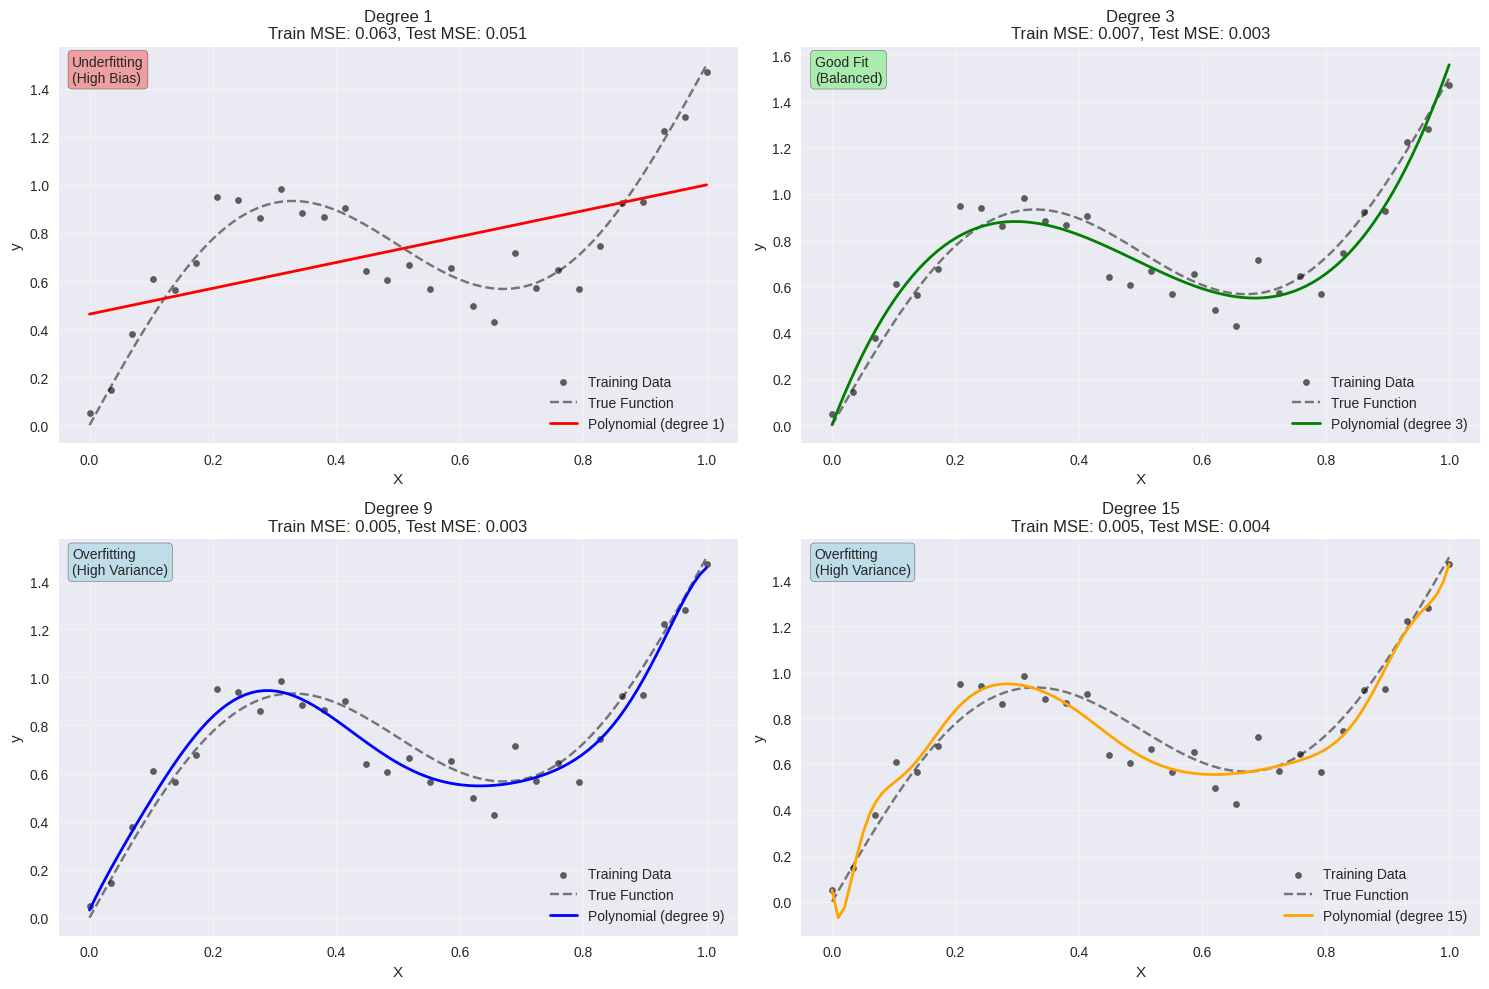

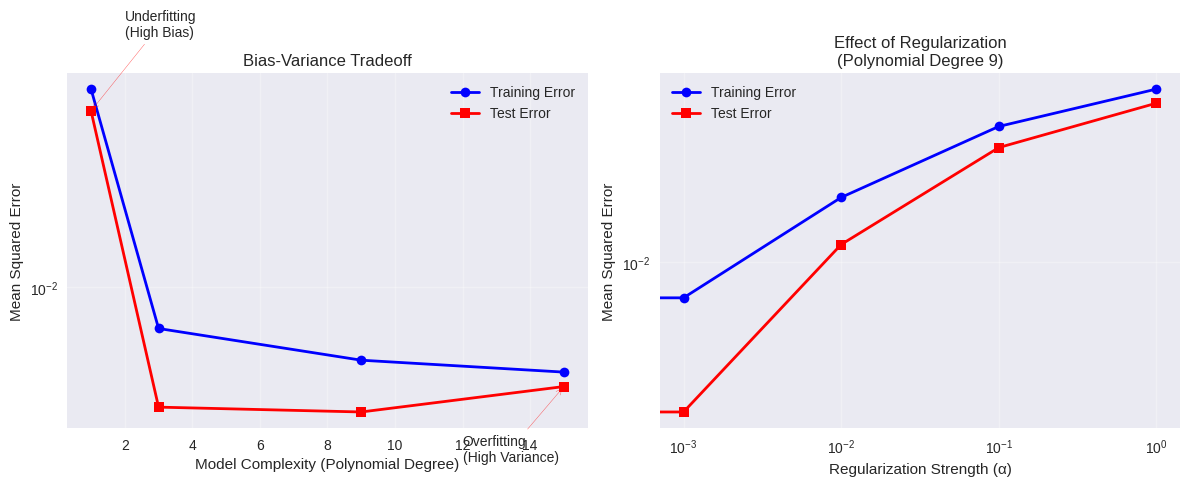

🎯 Key Insights:
📈 Underfitting (High Bias):
  • Model too simple to capture patterns
  • High error on both training and test data
  • Solution: Increase model complexity

📉 Overfitting (High Variance):
  • Model too complex, memorizes noise
  • Low training error, high test error
  • Solution: Regularization, more data, simpler model

⚖️ Sweet Spot:
  • Balance between bias and variance
  • Good performance on both training and test data
  • Achieved through proper model selection and regularization


In [8]:
# Demonstrate overfitting and underfitting with polynomial regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

# Generate synthetic data with noise
np.random.seed(42)
n_samples = 30
X_syn = np.linspace(0, 1, n_samples).reshape(-1, 1)
y_true = 1.5 * X_syn.ravel() + 0.5 * np.sin(2 * np.pi * X_syn.ravel())
y_syn = y_true + 0.1 * np.random.randn(n_samples)  # Add noise

# Create test set
X_test = np.linspace(0, 1, 100).reshape(-1, 1)
y_test_true = 1.5 * X_test.ravel() + 0.5 * np.sin(2 * np.pi * X_test.ravel())

# Different polynomial degrees
degrees = [1, 3, 9, 15]
colors = ['red', 'green', 'blue', 'orange']

plt.figure(figsize=(15, 10))

train_errors = []
test_errors = []

for i, degree in enumerate(degrees):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X_syn)
    X_test_poly = poly_features.transform(X_test)

    # Train model
    model = LinearRegression()
    model.fit(X_poly, y_syn)

    # Make predictions
    y_pred_train = model.predict(X_poly)
    y_pred_test = model.predict(X_test_poly)

    # Calculate errors
    train_error = mean_squared_error(y_syn, y_pred_train)
    test_error = mean_squared_error(y_test_true, y_pred_test)

    train_errors.append(train_error)
    test_errors.append(test_error)

    # Plot
    plt.subplot(2, 2, i + 1)
    plt.scatter(X_syn, y_syn, alpha=0.6, color='black', s=20, label='Training Data')
    plt.plot(X_test, y_test_true, 'k--', alpha=0.5, label='True Function')
    plt.plot(X_test, y_pred_test, color=colors[i], linewidth=2,
             label=f'Polynomial (degree {degree})')

    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Degree {degree}\nTrain MSE: {train_error:.3f}, Test MSE: {test_error:.3f}')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Add bias-variance indication
    if degree == 1:
        plt.text(0.02, 0.98, 'Underfitting\n(High Bias)', transform=plt.gca().transAxes,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))
    elif degree >= 9:
        plt.text(0.02, 0.98, 'Overfitting\n(High Variance)', transform=plt.gca().transAxes,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
    elif degree == 3:
        plt.text(0.02, 0.98, 'Good Fit\n(Balanced)', transform=plt.gca().transAxes,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

plt.tight_layout()
plt.show()

# Bias-Variance Tradeoff visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(degrees, train_errors, 'o-', color='blue', linewidth=2, label='Training Error')
plt.plot(degrees, test_errors, 's-', color='red', linewidth=2, label='Test Error')
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

# Add annotations
plt.annotate('Underfitting\n(High Bias)', xy=(1, test_errors[0]), xytext=(2, test_errors[0]*2),
            arrowprops=dict(arrowstyle='->', color='red', alpha=0.7))
plt.annotate('Overfitting\n(High Variance)', xy=(15, test_errors[-1]), xytext=(12, test_errors[-1]/2),
            arrowprops=dict(arrowstyle='->', color='red', alpha=0.7))

# Regularization effect
plt.subplot(1, 2, 2)
alphas = [0, 0.001, 0.01, 0.1, 1.0]
reg_train_errors = []
reg_test_errors = []

for alpha in alphas:
    # High degree polynomial with regularization
    poly_features = PolynomialFeatures(degree=9, include_bias=False)
    X_poly = poly_features.fit_transform(X_syn)
    X_test_poly = poly_features.transform(X_test)

    if alpha == 0:
        model = LinearRegression()
    else:
        model = Ridge(alpha=alpha)

    model.fit(X_poly, y_syn)

    y_pred_train = model.predict(X_poly)
    y_pred_test = model.predict(X_test_poly)

    reg_train_errors.append(mean_squared_error(y_syn, y_pred_train))
    reg_test_errors.append(mean_squared_error(y_test_true, y_pred_test))

plt.plot(alphas, reg_train_errors, 'o-', color='blue', linewidth=2, label='Training Error')
plt.plot(alphas, reg_test_errors, 's-', color='red', linewidth=2, label='Test Error')
plt.xlabel('Regularization Strength (α)')
plt.ylabel('Mean Squared Error')
plt.title('Effect of Regularization\n(Polynomial Degree 9)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xscale('log')
plt.yscale('log')

plt.tight_layout()
plt.show()

print("🎯 Key Insights:")
print("=" * 30)
print("📈 Underfitting (High Bias):")
print("  • Model too simple to capture patterns")
print("  • High error on both training and test data")
print("  • Solution: Increase model complexity")
print("\n📉 Overfitting (High Variance):")
print("  • Model too complex, memorizes noise")
print("  • Low training error, high test error")
print("  • Solution: Regularization, more data, simpler model")
print("\n⚖️ Sweet Spot:")
print("  • Balance between bias and variance")
print("  • Good performance on both training and test data")
print("  • Achieved through proper model selection and regularization")

## 🎛️ Regularization in Detail

Regularization is a technique to prevent overfitting by adding a penalty term to the cost function.

### Types of Regularization

#### 1. Ridge Regression (L2 Regularization)
$$J(\theta) = \text{MSE}(\theta) + \alpha \sum_{i=1}^{n} \theta_i^2$$

#### 2. Lasso Regression (L1 Regularization)
$$J(\theta) = \text{MSE}(\theta) + \alpha \sum_{i=1}^{n} |\theta_i|$$

#### 3. Elastic Net (L1 + L2)
$$J(\theta) = \text{MSE}(\theta) + r\alpha \sum_{i=1}^{n} |\theta_i| + \frac{1-r}{2}\alpha \sum_{i=1}^{n} \theta_i^2$$

Where:
- $\alpha$ = regularization strength (hyperparameter)
- $r$ = mix ratio between L1 and L2 (for Elastic Net)

### Hyperparameters

**Definition**: Parameters of the learning algorithm (not the model) that must be set before training.

**Examples**:
- Regularization strength ($\alpha$)
- Learning rate
- Number of neighbors in k-NN
- Tree depth in decision trees

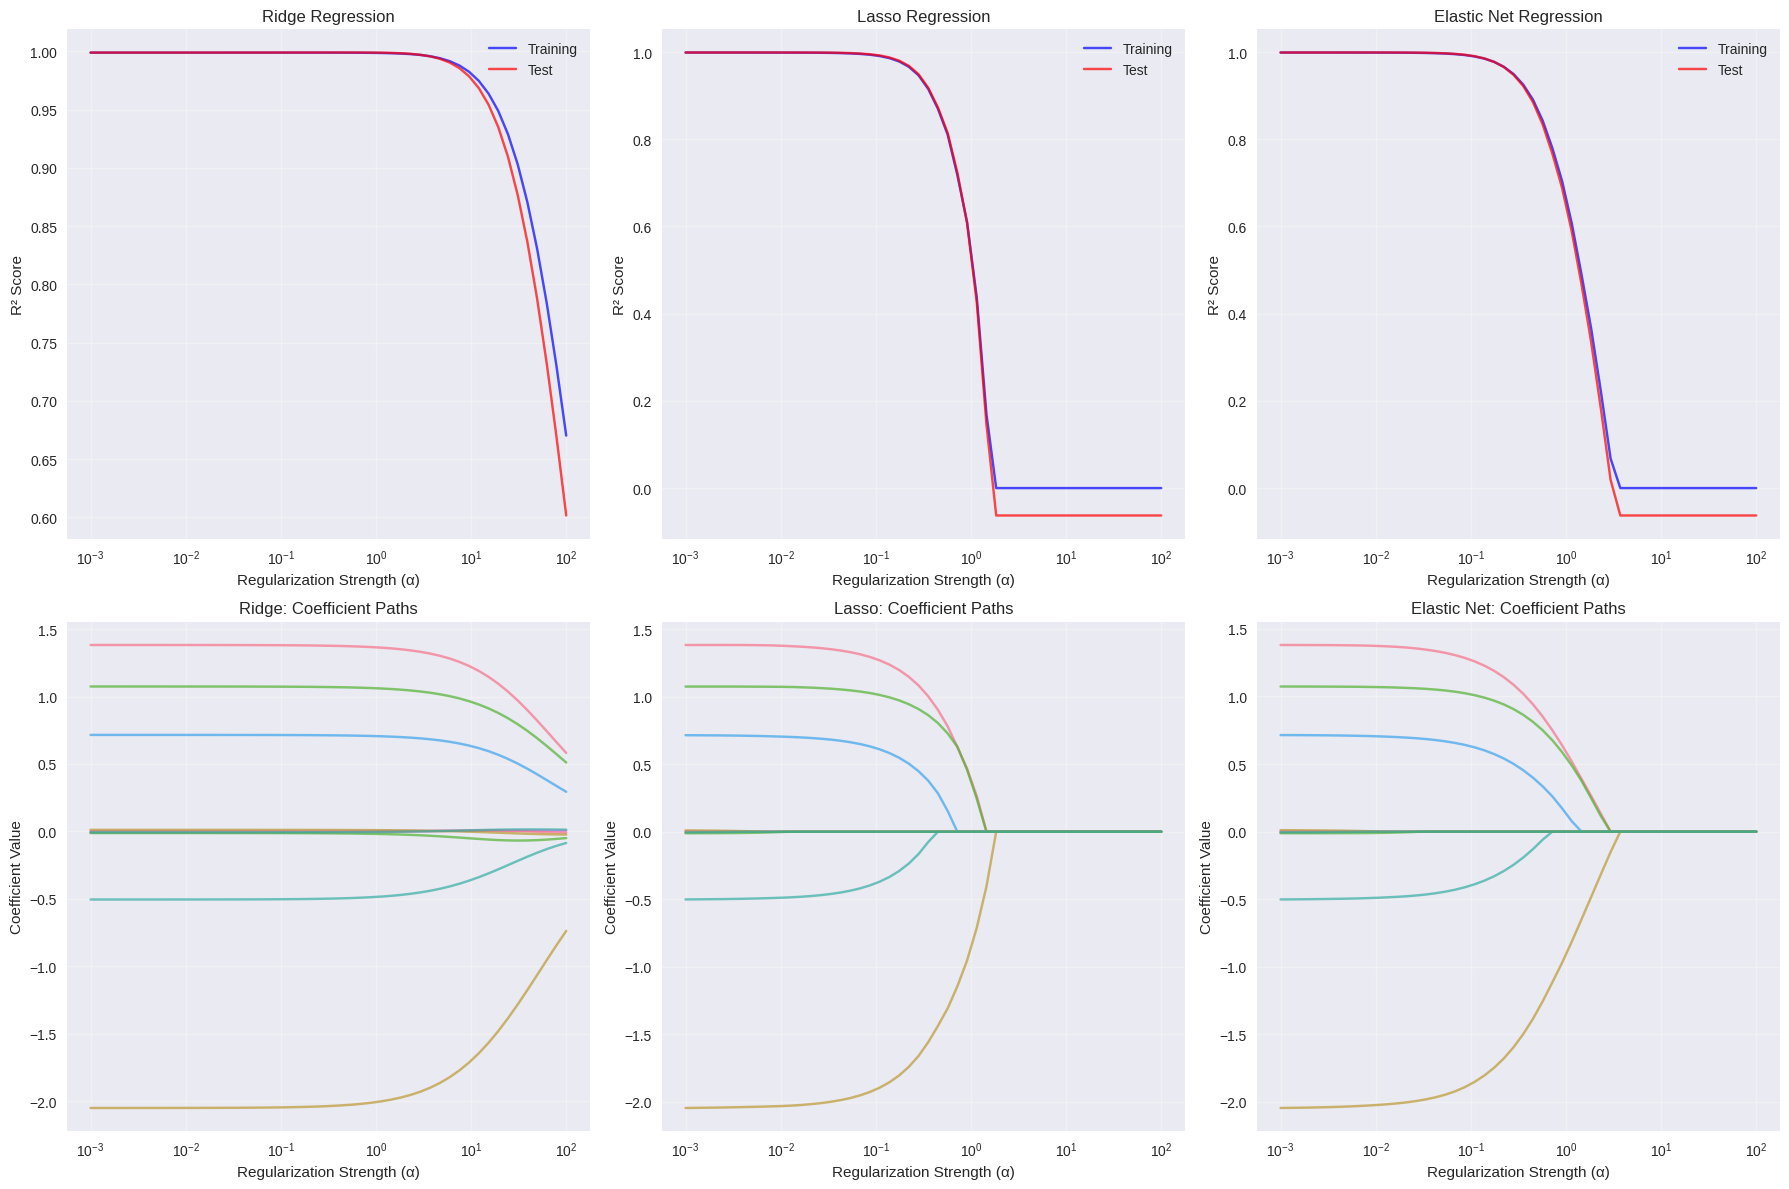

🎯 Optimal Regularization Strengths:
Ridge:      α = 0.4498, R² = 0.999
Lasso:      α = 0.0066, R² = 0.999
Elastic Net: α = 0.0083, R² = 0.999

🔍 Feature Selection (|coefficient| > 0.01):
True relevant features: [0, 1, 2, 3, 4]
Ridge selected:         [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(7), np.int64(8), np.int64(10), np.int64(13), np.int64(18)] (10 features)
Lasso selected:         [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)] (5 features)
Elastic Net selected:   [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(8), np.int64(18)] (7 features)

📊 Regularization Summary:
🔴 Ridge (L2):
  • Shrinks coefficients towards zero
  • Keeps all features but reduces their impact
  • Good when many features are somewhat relevant

🔵 Lasso (L1):
  • Sets some coefficients exactly to zero
  • Performs automatic feature selection
  • Good when few features are relevant

🟣 Elastic Net (L1 + L2):
  • Combines benefits of R

In [9]:
# Comprehensive regularization demonstration

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler

# Generate data with many features (some irrelevant)
np.random.seed(42)
n_samples, n_features = 100, 20
X_reg = np.random.randn(n_samples, n_features)

# Only first 5 features are relevant
true_coef = np.zeros(n_features)
true_coef[:5] = [1.5, -2.0, 1.0, -0.5, 0.8]

y_reg = X_reg @ true_coef + 0.1 * np.random.randn(n_samples)

# Standardize features
scaler = StandardScaler()
X_reg_scaled = scaler.fit_transform(X_reg)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_reg_scaled, y_reg, test_size=0.3, random_state=42)

# Range of regularization strengths
alphas = np.logspace(-3, 2, 50)

# Storage for results
ridge_train_scores = []
ridge_test_scores = []
lasso_train_scores = []
lasso_test_scores = []
elastic_train_scores = []
elastic_test_scores = []

ridge_coefs = []
lasso_coefs = []
elastic_coefs = []

# Test different regularization strengths
for alpha in alphas:
    # Ridge
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_train_scores.append(ridge.score(X_train, y_train))
    ridge_test_scores.append(ridge.score(X_test, y_test))
    ridge_coefs.append(ridge.coef_.copy())

    # Lasso
    lasso = Lasso(alpha=alpha, max_iter=1000)
    lasso.fit(X_train, y_train)
    lasso_train_scores.append(lasso.score(X_train, y_train))
    lasso_test_scores.append(lasso.score(X_test, y_test))
    lasso_coefs.append(lasso.coef_.copy())

    # Elastic Net
    elastic = ElasticNet(alpha=alpha, l1_ratio=0.5, max_iter=1000)
    elastic.fit(X_train, y_train)
    elastic_train_scores.append(elastic.score(X_train, y_train))
    elastic_test_scores.append(elastic.score(X_test, y_test))
    elastic_coefs.append(elastic.coef_.copy())

# Convert to arrays
ridge_coefs = np.array(ridge_coefs)
lasso_coefs = np.array(lasso_coefs)
elastic_coefs = np.array(elastic_coefs)

# Plotting
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Performance curves
axes[0, 0].plot(alphas, ridge_train_scores, 'b-', alpha=0.7, label='Training')
axes[0, 0].plot(alphas, ridge_test_scores, 'r-', alpha=0.7, label='Test')
axes[0, 0].set_xscale('log')
axes[0, 0].set_xlabel('Regularization Strength (α)')
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].set_title('Ridge Regression')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(alphas, lasso_train_scores, 'b-', alpha=0.7, label='Training')
axes[0, 1].plot(alphas, lasso_test_scores, 'r-', alpha=0.7, label='Test')
axes[0, 1].set_xscale('log')
axes[0, 1].set_xlabel('Regularization Strength (α)')
axes[0, 1].set_ylabel('R² Score')
axes[0, 1].set_title('Lasso Regression')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

axes[0, 2].plot(alphas, elastic_train_scores, 'b-', alpha=0.7, label='Training')
axes[0, 2].plot(alphas, elastic_test_scores, 'r-', alpha=0.7, label='Test')
axes[0, 2].set_xscale('log')
axes[0, 2].set_xlabel('Regularization Strength (α)')
axes[0, 2].set_ylabel('R² Score')
axes[0, 2].set_title('Elastic Net Regression')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# Coefficient paths
for i in range(min(10, n_features)):  # Plot first 10 features
    axes[1, 0].plot(alphas, ridge_coefs[:, i], alpha=0.7)
axes[1, 0].set_xscale('log')
axes[1, 0].set_xlabel('Regularization Strength (α)')
axes[1, 0].set_ylabel('Coefficient Value')
axes[1, 0].set_title('Ridge: Coefficient Paths')
axes[1, 0].grid(True, alpha=0.3)

for i in range(min(10, n_features)):
    axes[1, 1].plot(alphas, lasso_coefs[:, i], alpha=0.7)
axes[1, 1].set_xscale('log')
axes[1, 1].set_xlabel('Regularization Strength (α)')
axes[1, 1].set_ylabel('Coefficient Value')
axes[1, 1].set_title('Lasso: Coefficient Paths')
axes[1, 1].grid(True, alpha=0.3)

for i in range(min(10, n_features)):
    axes[1, 2].plot(alphas, elastic_coefs[:, i], alpha=0.7)
axes[1, 2].set_xscale('log')
axes[1, 2].set_xlabel('Regularization Strength (α)')
axes[1, 2].set_ylabel('Coefficient Value')
axes[1, 2].set_title('Elastic Net: Coefficient Paths')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find optimal alpha for each method
optimal_ridge_idx = np.argmax(ridge_test_scores)
optimal_lasso_idx = np.argmax(lasso_test_scores)
optimal_elastic_idx = np.argmax(elastic_test_scores)

print("🎯 Optimal Regularization Strengths:")
print("=" * 40)
print(f"Ridge:      α = {alphas[optimal_ridge_idx]:.4f}, R² = {ridge_test_scores[optimal_ridge_idx]:.3f}")
print(f"Lasso:      α = {alphas[optimal_lasso_idx]:.4f}, R² = {lasso_test_scores[optimal_lasso_idx]:.3f}")
print(f"Elastic Net: α = {alphas[optimal_elastic_idx]:.4f}, R² = {elastic_test_scores[optimal_elastic_idx]:.3f}")

# Feature selection comparison
ridge_selected = np.abs(ridge_coefs[optimal_ridge_idx]) > 0.01
lasso_selected = np.abs(lasso_coefs[optimal_lasso_idx]) > 0.01
elastic_selected = np.abs(elastic_coefs[optimal_elastic_idx]) > 0.01

print(f"\n🔍 Feature Selection (|coefficient| > 0.01):")
print("=" * 50)
print(f"True relevant features: {list(range(5))}")
print(f"Ridge selected:         {list(np.where(ridge_selected)[0])} ({sum(ridge_selected)} features)")
print(f"Lasso selected:         {list(np.where(lasso_selected)[0])} ({sum(lasso_selected)} features)")
print(f"Elastic Net selected:   {list(np.where(elastic_selected)[0])} ({sum(elastic_selected)} features)")

print("\n📊 Regularization Summary:")
print("" + "="*40)
print("🔴 Ridge (L2):")
print("  • Shrinks coefficients towards zero")
print("  • Keeps all features but reduces their impact")
print("  • Good when many features are somewhat relevant")
print("\n🔵 Lasso (L1):")
print("  • Sets some coefficients exactly to zero")
print("  • Performs automatic feature selection")
print("  • Good when few features are relevant")
print("\n🟣 Elastic Net (L1 + L2):")
print("  • Combines benefits of Ridge and Lasso")
print("  • Good balance between feature selection and shrinkage")
print("  • Useful when features are correlated")

## 🧪 Testing and Validation

### The Importance of Proper Evaluation

**Key Principle**: Never use the same data for training and final evaluation!

### Data Splits

#### 1. Basic Train-Test Split
- **Training Set**: Train the model
- **Test Set**: Final evaluation of generalization performance
- **Typical Split**: 80% train, 20% test

#### 2. Train-Validation-Test Split
- **Training Set**: Train candidate models
- **Validation Set**: Select best model and tune hyperparameters
- **Test Set**: Final unbiased evaluation
- **Typical Split**: 60% train, 20% validation, 20% test

#### 3. Cross-Validation
- **k-Fold CV**: Split data into k folds, use k-1 for training, 1 for validation
- **Repeat**: k times, each fold used as validation once
- **Final Score**: Average of k validation scores

**Mathematical Framework:**
$$\text{CV Score} = \frac{1}{k} \sum_{i=1}^{k} \text{Score}_i$$

### Key Terminology

- **Generalization Error** (Out-of-sample error): Performance on new, unseen data
- **Training Error**: Performance on training data
- **Validation Error**: Performance on validation data
- **Test Error**: Final estimate of generalization error

### Data Mismatch Problem

When training data distribution ≠ production data distribution:
- **Train-Dev Set**: Hold out part of training data to detect overfitting
- **If Train-Dev performance is good but Validation performance is bad**: Data mismatch
- **If Train-Dev performance is bad**: Overfitting

In [10]:
# Comprehensive validation and testing demonstration

from sklearn.model_selection import (
    train_test_split, cross_val_score, validation_curve,
    GridSearchCV, StratifiedKFold
)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Generate a more complex dataset
np.random.seed(42)
n_samples = 1000
n_features = 10

X_complex = np.random.randn(n_samples, n_features)
# Create non-linear relationship
y_complex = (X_complex[:, 0]**2 +
            np.sin(X_complex[:, 1]) +
            X_complex[:, 2] * X_complex[:, 3] +
            0.5 * np.random.randn(n_samples))

print("🧪 Validation and Testing Strategies")
print("=" * 40)

# 1. Simple Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_complex, y_complex, test_size=0.2, random_state=42
)

print(f"\n📊 Data Split:")
print(f"  Total samples: {len(X_complex)}")
print(f"  Training: {len(X_train)} ({len(X_train)/len(X_complex):.1%})")
print(f"  Testing:  {len(X_test)} ({len(X_test)/len(X_complex):.1%})")

# 2. Train-Validation-Test Split
X_train_val, X_test_final, y_train_val, y_test_final = train_test_split(
    X_complex, y_complex, test_size=0.2, random_state=42
)
X_train_tv, X_val, y_train_tv, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42  # 0.25 * 0.8 = 0.2 of total
)

print(f"\n📊 Three-way Split:")
print(f"  Training:   {len(X_train_tv)} ({len(X_train_tv)/len(X_complex):.1%})")
print(f"  Validation: {len(X_val)} ({len(X_val)/len(X_complex):.1%})")
print(f"  Testing:    {len(X_test_final)} ({len(X_test_final)/len(X_complex):.1%})")

# Train different models and compare validation strategies
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=50, random_state=42),
    'Ridge Regression': Ridge(alpha=1.0)
}

# Store results
results = {}
cv_results = {}

for name, model in models.items():
    # Simple train-test
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    # Cross-validation
    cv_scores = cross_val_score(model, X_train_val, y_train_val, cv=5, scoring='r2')

    results[name] = {
        'train_score': train_score,
        'test_score': test_score,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std()
    }

    cv_results[name] = cv_scores

print(f"\n🎯 Model Comparison:")
print("=" * 60)
print(f"{'Model':<20} {'Train R²':<10} {'Test R²':<10} {'CV Mean':<10} {'CV Std':<10}")
print("-" * 60)
for name, scores in results.items():
    print(f"{name:<20} {scores['train_score']:<10.3f} {scores['test_score']:<10.3f} "
          f"{scores['cv_mean']:<10.3f} {scores['cv_std']:<10.3f}")

🧪 Validation and Testing Strategies

📊 Data Split:
  Total samples: 1000
  Training: 800 (80.0%)
  Testing:  200 (20.0%)

📊 Three-way Split:
  Training:   600 (60.0%)
  Validation: 200 (20.0%)
  Testing:    200 (20.0%)

🎯 Model Comparison:
Model                Train R²   Test R²    CV Mean    CV Std    
------------------------------------------------------------
Linear Regression    0.126      0.080      0.089      0.052     
Random Forest        0.959      0.713      0.682      0.035     
Ridge Regression     0.126      0.080      0.089      0.052     


In [11]:
# Hyperparameter tuning demonstration
print(f"\n🔧 Hyperparameter Tuning with Grid Search:")
print("=" * 45)

# Grid search for Random Forest
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_val, y_train_val)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score: {grid_search.best_score_:.3f}")

# Final evaluation on test set
final_score = grid_search.score(X_test_final, y_test_final)
print(f"Final test score: {final_score:.3f}")

# Validation curve demonstration
train_sizes = [50, 100, 200, 400, 600, 800]
param_range = [1, 5, 10, 20, 50, 100]

train_scores_rf, val_scores_rf = validation_curve(
    RandomForestRegressor(random_state=42), X_train_val, y_train_val,
    param_name='n_estimators', param_range=param_range,
    cv=5, scoring='r2'
)


🔧 Hyperparameter Tuning with Grid Search:
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best CV score: 0.689
Final test score: 0.715


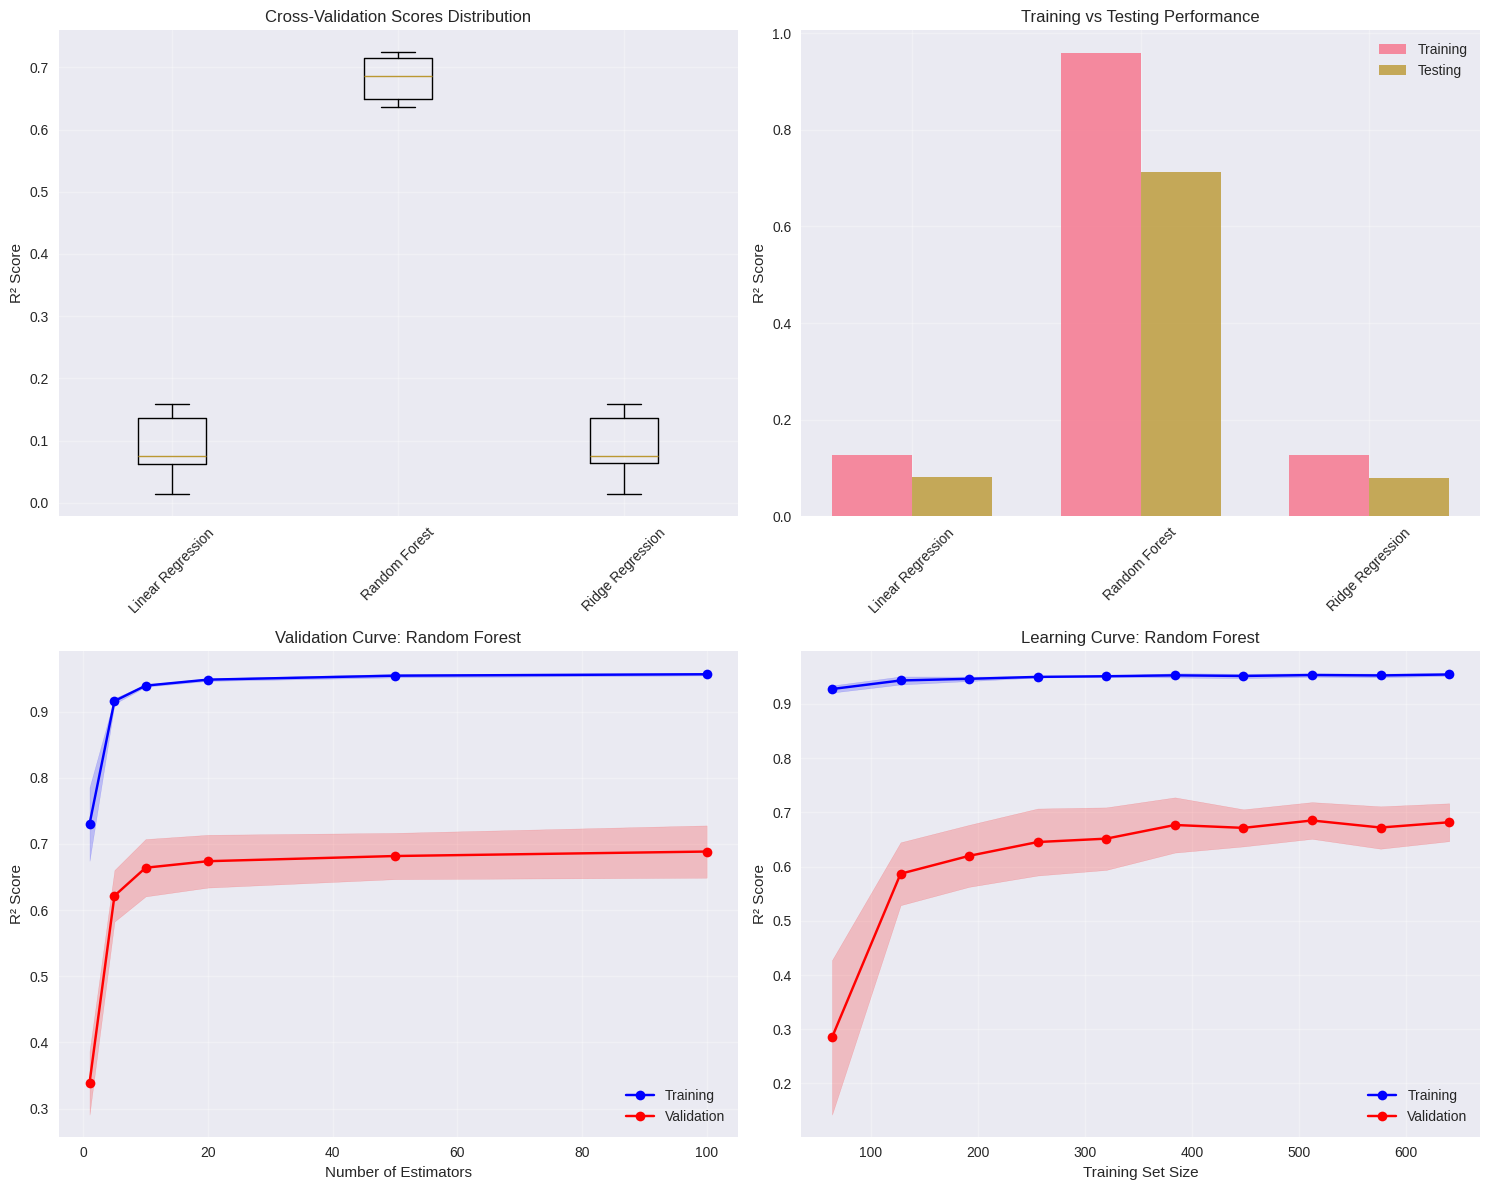


📊 Validation Strategy Insights:
🔍 Cross-Validation Benefits:
  • More reliable performance estimates
  • Better use of limited data
  • Provides confidence intervals

⚖️ Learning Curves Show:
  • Whether model benefits from more data
  • Convergence of training and validation scores
  • Signs of overfitting or underfitting

🎯 Validation Curves Show:
  • Optimal hyperparameter values
  • Bias-variance tradeoff
  • Model complexity sweet spot


In [12]:
# Comprehensive validation visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Cross-validation scores comparison
axes[0, 0].boxplot([cv_results[name] for name in models.keys()],
                   labels=list(models.keys()))
axes[0, 0].set_title('Cross-Validation Scores Distribution')
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# Train vs Test scores
model_names = list(results.keys())
train_scores = [results[name]['train_score'] for name in model_names]
test_scores = [results[name]['test_score'] for name in model_names]

x_pos = np.arange(len(model_names))
width = 0.35

axes[0, 1].bar(x_pos - width/2, train_scores, width, label='Training', alpha=0.8)
axes[0, 1].bar(x_pos + width/2, test_scores, width, label='Testing', alpha=0.8)
axes[0, 1].set_title('Training vs Testing Performance')
axes[0, 1].set_ylabel('R² Score')
axes[0, 1].set_xticks(x_pos)
axes[0, 1].set_xticklabels(model_names, rotation=45)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Validation curve
train_mean = np.mean(train_scores_rf, axis=1)
train_std = np.std(train_scores_rf, axis=1)
val_mean = np.mean(val_scores_rf, axis=1)
val_std = np.std(val_scores_rf, axis=1)

axes[1, 0].plot(param_range, train_mean, 'o-', color='blue', label='Training')
axes[1, 0].fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
axes[1, 0].plot(param_range, val_mean, 'o-', color='red', label='Validation')
axes[1, 0].fill_between(param_range, val_mean - val_std, val_mean + val_std, alpha=0.2, color='red')
axes[1, 0].set_xlabel('Number of Estimators')
axes[1, 0].set_ylabel('R² Score')
axes[1, 0].set_title('Validation Curve: Random Forest')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Learning curve demonstration
from sklearn.model_selection import learning_curve

train_sizes_lc, train_scores_lc, val_scores_lc = learning_curve(
    RandomForestRegressor(n_estimators=50, random_state=42),
    X_train_val, y_train_val, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='r2'
)

train_mean_lc = np.mean(train_scores_lc, axis=1)
train_std_lc = np.std(train_scores_lc, axis=1)
val_mean_lc = np.mean(val_scores_lc, axis=1)
val_std_lc = np.std(val_scores_lc, axis=1)

axes[1, 1].plot(train_sizes_lc, train_mean_lc, 'o-', color='blue', label='Training')
axes[1, 1].fill_between(train_sizes_lc, train_mean_lc - train_std_lc,
                        train_mean_lc + train_std_lc, alpha=0.2, color='blue')
axes[1, 1].plot(train_sizes_lc, val_mean_lc, 'o-', color='red', label='Validation')
axes[1, 1].fill_between(train_sizes_lc, val_mean_lc - val_std_lc,
                        val_mean_lc + val_std_lc, alpha=0.2, color='red')
axes[1, 1].set_xlabel('Training Set Size')
axes[1, 1].set_ylabel('R² Score')
axes[1, 1].set_title('Learning Curve: Random Forest')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Validation Strategy Insights:")
print("=" * 40)
print("🔍 Cross-Validation Benefits:")
print("  • More reliable performance estimates")
print("  • Better use of limited data")
print("  • Provides confidence intervals")
print("\n⚖️ Learning Curves Show:")
print("  • Whether model benefits from more data")
print("  • Convergence of training and validation scores")
print("  • Signs of overfitting or underfitting")
print("\n🎯 Validation Curves Show:")
print("  • Optimal hyperparameter values")
print("  • Bias-variance tradeoff")
print("  • Model complexity sweet spot")

## 🍽️ No Free Lunch Theorem

### Theorem Statement

**David Wolpert (1996)**: If you make absolutely no assumptions about the data, there is no reason to prefer one model over any other.

### Mathematical Formulation

For any two algorithms $A$ and $B$, and any performance measure $P$:

$$\sum_{f} P(A|f) = \sum_{f} P(B|f)$$

Where the sum is over all possible target functions $f$.

### Practical Implications

1. **No Universal Best Algorithm**: No single algorithm dominates all others across all possible problems
2. **Domain Knowledge Matters**: Success depends on making reasonable assumptions about your specific problem
3. **Empirical Evaluation**: Must test multiple algorithms on your specific dataset
4. **Algorithm Selection**: Choose algorithms based on problem characteristics and constraints

### Real-World Application

- **Simple problems**: Linear models often sufficient
- **Complex problems**: Neural networks, ensemble methods
- **Small datasets**: Simple models to avoid overfitting
- **Large datasets**: Complex models can capture intricate patterns
- **Interpretability required**: Decision trees, linear models
- **High accuracy needed**: Ensemble methods, deep learning

🍽️ No Free Lunch Theorem Demonstration

📊 Algorithm Performance Across Different Datasets:
Algorithm           Linear SeparableCircular PatternComplex PatternHigh DimensionalAverage
----------------------------------------------------------------------
Logistic Regression 0.872           0.474           0.888           0.818           0.763
Decision Tree       0.934           0.920           0.944*          0.868           0.916
Random Forest       0.954           0.938           0.944*          0.900*          0.934
SVM (RBF)           0.920           0.960*          0.910           0.892           0.920
Neural Network      0.962*          0.956           0.914           0.842           0.919
Naive Bayes         0.876           0.950           0.890           0.826           0.886

* indicates best performance on that dataset

🏆 Best Algorithm per Dataset:
Linear Separable  : Neural Network (0.962)
Circular Pattern  : SVM (RBF) (0.960)
Complex Pattern   : Decision Tree (0.944)
High Di

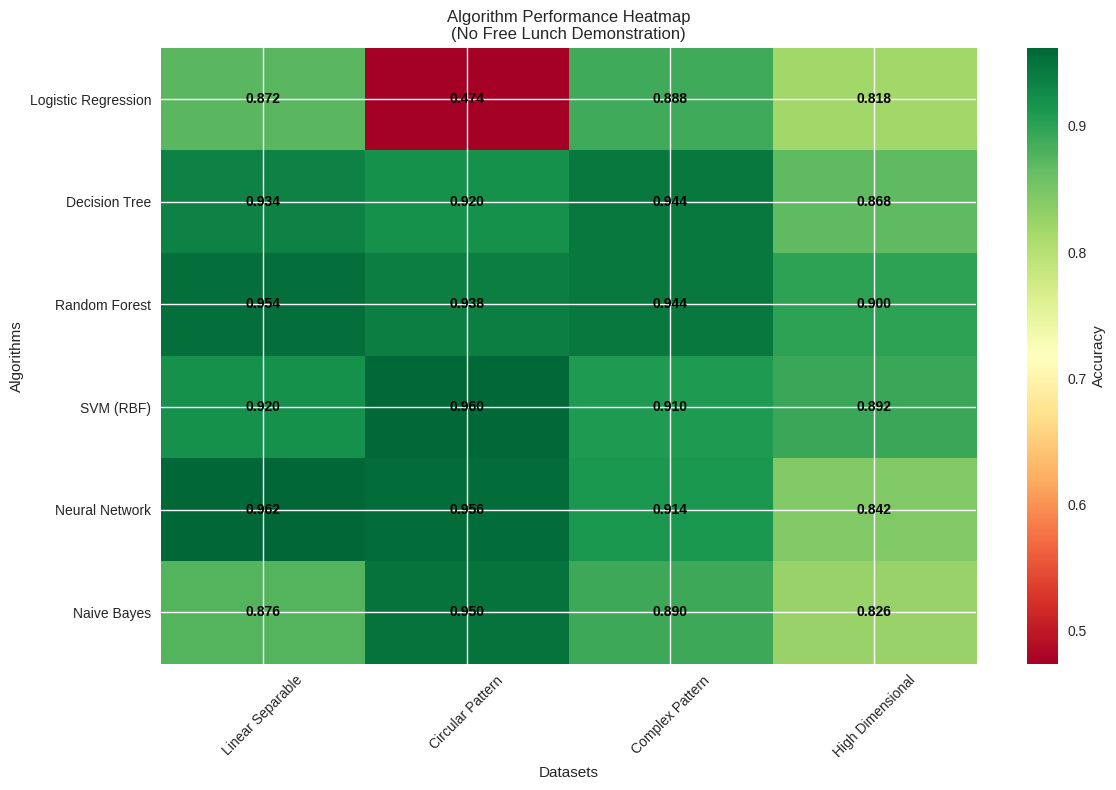


📈 Statistical Analysis:
Performance variation across datasets:
  Logistic Regression : σ² = 0.0285
  Decision Tree       : σ² = 0.0009
  Random Forest       : σ² = 0.0004
  SVM (RBF)           : σ² = 0.0006
  Neural Network      : σ² = 0.0023
  Naive Bayes         : σ² = 0.0020

🎯 No Free Lunch Insights:
• No single algorithm dominates all datasets
• Algorithm choice depends on problem characteristics
• Domain knowledge guides algorithm selection
• Empirical evaluation is essential
• Different algorithms excel in different contexts


In [13]:
# Demonstrate No Free Lunch theorem with different datasets
from sklearn.datasets import make_classification, make_regression, make_circles
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

print("🍽️ No Free Lunch Theorem Demonstration")
print("=" * 45)

# Create different types of datasets
datasets = {}

# Linear separable data
X_linear, y_linear = make_classification(n_samples=500, n_features=2, n_redundant=0,
                                        n_informative=2, random_state=42, n_clusters_per_class=1)
datasets['Linear Separable'] = (X_linear, y_linear)

# Non-linear data (circles)
X_circles, y_circles = make_circles(n_samples=500, noise=0.1, factor=0.6, random_state=42)
datasets['Circular Pattern'] = (X_circles, y_circles)

# Complex non-linear data
X_complex, y_complex = make_classification(n_samples=500, n_features=2, n_redundant=0,
                                          n_informative=2, n_clusters_per_class=2,
                                          random_state=42)
datasets['Complex Pattern'] = (X_complex, y_complex)

# High-dimensional data
X_highdim, y_highdim = make_classification(n_samples=500, n_features=20, n_informative=5,
                                          n_redundant=0, random_state=42)
datasets['High Dimensional'] = (X_highdim, y_highdim)

# Define algorithms
algorithms = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    'Random Forest': RandomForestClassifier(n_estimators=50, random_state=42),
    'SVM (RBF)': SVC(kernel='rbf', random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(50,), random_state=42, max_iter=500),
    'Naive Bayes': GaussianNB()
}

# Store results
performance_matrix = np.zeros((len(algorithms), len(datasets)))
algorithm_names = list(algorithms.keys())
dataset_names = list(datasets.keys())

# Evaluate each algorithm on each dataset
for i, (alg_name, algorithm) in enumerate(algorithms.items()):
    for j, (data_name, (X, y)) in enumerate(datasets.items()):
        # Cross-validation
        scores = cross_val_score(algorithm, X, y, cv=5, scoring='accuracy')
        performance_matrix[i, j] = scores.mean()

# Display results
print(f"\n📊 Algorithm Performance Across Different Datasets:")
print("=" * 70)
print(f"{'Algorithm':<20}", end="")
for dataset_name in dataset_names:
    print(f"{dataset_name:<15}", end="")
print("Average")
print("-" * 70)

for i, alg_name in enumerate(algorithm_names):
    print(f"{alg_name:<20}", end="")
    row_scores = []
    for j in range(len(dataset_names)):
        score = performance_matrix[i, j]
        print(f"{score:.3f}{'*' if score == np.max(performance_matrix[:, j]) else ' ':<11}", end="")
        row_scores.append(score)
    print(f"{np.mean(row_scores):.3f}")

print("\n* indicates best performance on that dataset")

# Find best algorithm for each dataset
print(f"\n🏆 Best Algorithm per Dataset:")
print("=" * 35)
for j, dataset_name in enumerate(dataset_names):
    best_idx = np.argmax(performance_matrix[:, j])
    best_algorithm = algorithm_names[best_idx]
    best_score = performance_matrix[best_idx, j]
    print(f"{dataset_name:<18}: {best_algorithm} ({best_score:.3f})")

# Visualize performance matrix
plt.figure(figsize=(12, 8))
im = plt.imshow(performance_matrix, cmap='RdYlGn', aspect='auto')
plt.colorbar(im, label='Accuracy')
plt.xticks(range(len(dataset_names)), dataset_names, rotation=45)
plt.yticks(range(len(algorithm_names)), algorithm_names)
plt.title('Algorithm Performance Heatmap\n(No Free Lunch Demonstration)')
plt.xlabel('Datasets')
plt.ylabel('Algorithms')

# Add text annotations
for i in range(len(algorithm_names)):
    for j in range(len(dataset_names)):
        text = plt.text(j, i, f'{performance_matrix[i, j]:.3f}',
                       ha="center", va="center", color="black", fontweight='bold')

plt.tight_layout()
plt.show()

# Statistical analysis
print(f"\n📈 Statistical Analysis:")
print("=" * 30)
print(f"Performance variation across datasets:")
for i, alg_name in enumerate(algorithm_names):
    variance = np.var(performance_matrix[i, :])
    print(f"  {alg_name:<20}: σ² = {variance:.4f}")

print(f"\n🎯 No Free Lunch Insights:")
print("=" * 35)
print("• No single algorithm dominates all datasets")
print("• Algorithm choice depends on problem characteristics")
print("• Domain knowledge guides algorithm selection")
print("• Empirical evaluation is essential")
print("• Different algorithms excel in different contexts")

## 📝 Chapter 1 Exercises - Solutions

Let's solve all the exercises from Chapter 1 with detailed explanations tied to the theory we've covered.

### Exercise 1: How would you define Machine Learning?

**Answer:**

Machine Learning can be defined from multiple perspectives:

#### **Simple Definition:**
Machine Learning is the science and art of programming computers so they can **learn from data** without being explicitly programmed for every specific task.

#### **Technical Definition (Tom Mitchell, 1997):**
A computer program is said to learn from experience **E** with respect to some task **T** and some performance measure **P**, if its performance on **T**, as measured by **P**, improves with experience **E**.

#### **Mathematical Framework:**
ML systems seek to find a function $f: X \rightarrow Y$ that maps inputs to outputs by:
1. **Learning**: $f^* = \arg\min_f \mathbb{E}[L(y, f(x))]$
2. **Generalizing**: Performing well on unseen data from the same distribution

#### **Key Characteristics:**
- **Data-driven**: Performance improves with more relevant data
- **Automatic**: Discovers patterns without manual rule programming
- **Generalizable**: Makes predictions on new, unseen instances
- **Adaptive**: Can update with new information

### Exercise 2: Can you name four types of problems where ML shines?

**Answer:**

#### **1. Problems with Complex Manual Rules**
- **Example**: Spam detection, fraud detection
- **Why ML shines**: Traditional rule-based systems become unwieldy with hundreds of hand-crafted rules that need constant updating
- **ML advantage**: Automatically learns patterns and adapts to new spam/fraud techniques

#### **2. Problems Without Known Algorithmic Solutions**
- **Example**: Speech recognition, image classification, natural language understanding
- **Why ML shines**: No clear algorithmic path exists to solve these problems
- **ML advantage**: Can learn complex mappings from input to output through examples

#### **3. Fluctuating Environments**
- **Example**: Stock market prediction, recommendation systems, user behavior analysis
- **Why ML shines**: Patterns change over time, requiring constant adaptation
- **ML advantage**: Can continuously learn and adapt to new patterns

#### **4. Data Mining and Insight Discovery**
- **Example**: Customer segmentation, market analysis, scientific discovery
- **Why ML shines**: Humans cannot process vast amounts of data to find subtle patterns
- **ML advantage**: Can discover hidden correlations and insights in large datasets

### Exercise 3: What is a labeled training set?

**Answer:**

A **labeled training set** is a collection of training examples where each example consists of:
- **Input features** (predictors, attributes): $x_i$
- **Corresponding target labels** (desired outputs): $y_i$

#### **Mathematical Representation:**
$$\mathcal{D} = \{(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)\}$$

Where:
- $x_i \in \mathbb{R}^d$ (feature vector)
- $y_i \in \mathcal{Y}$ (label from label space)

#### **Examples:**
- **Email Classification**: $(\text{email text}, \text{spam/ham})$
- **Image Recognition**: $(\text{pixel values}, \text{cat/dog})$
- **House Pricing**: $(\text{size, location, age}, \text{price})$

#### **Purpose:**
- Used in **supervised learning**
- Algorithm learns the mapping $f: X \rightarrow Y$
- Labels provide the "correct answers" during training
- Essential for tasks where we know the desired output

### Exercise 4: What are the two most common supervised tasks?

**Answer:**

#### **1. Classification**
- **Task**: Predict discrete categorical labels
- **Output space**: $\mathcal{Y} = \{c_1, c_2, ..., c_k\}$ (finite set of classes)
- **Examples**:
  - Email spam detection: $\{\text{spam}, \text{ham}\}$
  - Image recognition: $\{\text{cat}, \text{dog}, \text{bird}\}$
  - Medical diagnosis: $\{\text{positive}, \text{negative}\}$

#### **Mathematical Framework:**
$$f: \mathbb{R}^d \rightarrow \{1, 2, ..., k\}$$

**Performance measure**: Accuracy = $\frac{\text{Correct Predictions}}{\text{Total Predictions}}$

#### **2. Regression**
- **Task**: Predict continuous numerical values
- **Output space**: $\mathcal{Y} = \mathbb{R}$ (real numbers)
- **Examples**:
  - House price prediction
  - Stock price forecasting
  - Temperature prediction

#### **Mathematical Framework:**
$$f: \mathbb{R}^d \rightarrow \mathbb{R}$$

**Performance measure**: RMSE = $\sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}$

#### **Key Differences:**
| Aspect | Classification | Regression |
|--------|----------------|------------|
| Output | Discrete categories | Continuous values |
| Examples | Spam/Ham, Cat/Dog | Price, Temperature |
| Algorithms | Logistic Regression, SVM | Linear Regression, SVR |
| Metrics | Accuracy, Precision, Recall | RMSE, MAE, R² |

### Exercise 5: Can you name four common unsupervised tasks?

**Answer:**

#### **1. Clustering**
- **Goal**: Group similar instances together
- **Algorithms**: K-Means, DBSCAN, Hierarchical Clustering
- **Applications**: Customer segmentation, gene sequencing, market research
- **Mathematical objective**: Minimize intra-cluster distance, maximize inter-cluster distance

$$\min \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2$$

#### **2. Dimensionality Reduction**
- **Goal**: Reduce feature space while preserving important information
- **Algorithms**: PCA, t-SNE, LLE, Kernel PCA
- **Applications**: Data visualization, noise reduction, feature extraction
- **Mathematical objective**: Find projection that preserves variance

$$\max \text{Var}(Xw) \text{ subject to } ||w||^2 = 1$$

#### **3. Anomaly Detection**
- **Goal**: Identify unusual or rare instances
- **Algorithms**: One-class SVM, Isolation Forest, Local Outlier Factor
- **Applications**: Fraud detection, network intrusion, quality control
- **Mathematical approach**: Model normal behavior, flag deviations

#### **4. Association Rule Learning**
- **Goal**: Discover relationships between variables
- **Algorithms**: Apriori, Eclat, FP-Growth
- **Applications**: Market basket analysis, web usage mining
- **Example rule**: $\{\text{bread}, \text{butter}\} \Rightarrow \{\text{milk}\}$
- **Metrics**: Support, Confidence, Lift

### Exercise 6: What type of ML algorithm would you use to allow a robot to walk in various unknown terrains?

**Answer:**

#### **Reinforcement Learning (RL)**

This is a classic **Reinforcement Learning** problem because:

#### **Why Reinforcement Learning?**

1. **Trial-and-Error Learning**: Robot must learn through experimentation
2. **No Labeled Examples**: No dataset of "correct" walking actions for all terrains
3. **Delayed Feedback**: Actions have consequences that unfold over time
4. **Environment Interaction**: Robot must actively interact with various terrains
5. **Reward-Based**: Success measured by walking stability and progress

#### **RL Framework Components:**

- **Agent**: The robot
- **Environment**: Various terrains (grass, rocks, sand, etc.)
- **State**: Robot's current position, orientation, joint angles, terrain sensors
- **Actions**: Joint movements, step adjustments
- **Rewards**: Positive for stable walking, negative for falling
- **Policy**: Strategy for selecting actions given current state

#### **Mathematical Framework:**

$$\pi^*(s) = \arg\max_a Q^*(s,a)$$

Where $Q^*(s,a)$ is the optimal action-value function.

#### **Specific Algorithms:**
- **Deep Q-Networks (DQN)**: For discrete action spaces
- **Policy Gradient Methods**: For continuous control
- **Actor-Critic**: Combines value estimation with policy optimization
- **Proximal Policy Optimization (PPO)**: Stable policy updates

#### **Training Process:**
1. Robot attempts to walk on terrain
2. Receives rewards based on performance
3. Updates policy to maximize cumulative reward
4. Gradually learns optimal walking strategies
5. Adapts to new terrains using learned skills

### Exercise 7: What type of algorithm would you use to segment your customers into multiple groups?

**Answer:**

#### **Clustering Algorithms (Unsupervised Learning)**

Customer segmentation is a classic **clustering** problem because:

#### **Why Clustering?**

1. **No Predefined Groups**: Don't know customer segments in advance
2. **Discovery Task**: Want to discover natural groupings in data
3. **Unlabeled Data**: No "correct" segmentation to learn from
4. **Similarity-Based**: Group customers with similar characteristics

#### **Popular Clustering Algorithms:**

**1. K-Means Clustering**
- **Best for**: Spherical clusters, known number of segments
- **Objective**: Minimize within-cluster sum of squares
$$\min \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2$$

**2. Hierarchical Clustering**
- **Best for**: Unknown number of segments, hierarchical structure
- **Output**: Dendrogram showing cluster relationships

**3. DBSCAN**
- **Best for**: Irregular cluster shapes, automatic outlier detection
- **Advantage**: Doesn't require specifying number of clusters

**4. Gaussian Mixture Models (GMM)**
- **Best for**: Overlapping clusters, probabilistic assignments
- **Output**: Probability of belonging to each cluster

#### **Feature Engineering for Customer Segmentation:**

**RFM Analysis** (common approach):
- **Recency**: How recently did customer make a purchase?
- **Frequency**: How often do they purchase?
- **Monetary**: How much do they spend?

**Additional Features**:
- Demographics (age, income, location)
- Behavioral (website activity, preferences)
- Transactional (purchase history, seasonality)

#### **Typical Workflow:**
1. **Data Collection**: Gather customer transaction and demographic data
2. **Feature Engineering**: Create meaningful variables (RFM, etc.)
3. **Data Preprocessing**: Normalize/standardize features
4. **Algorithm Selection**: Choose clustering method
5. **Optimal K Selection**: Use elbow method, silhouette analysis
6. **Interpretation**: Analyze and name discovered segments
7. **Validation**: Ensure segments are actionable and meaningful

#### **Example Segments:**
- **VIP Customers**: High frequency, high monetary, recent purchases
- **At-Risk**: High value but haven't purchased recently
- **New Customers**: Recent first purchase, low frequency
- **Bargain Hunters**: High frequency, low monetary value

### Exercise 8: Would you frame spam detection as supervised or unsupervised learning?

**Answer:**

#### **Supervised Learning**

Spam detection is typically framed as a **supervised learning** problem, specifically **binary classification**.

#### **Why Supervised Learning?**

1. **Clear Target Labels**: Emails can be definitively labeled as "spam" or "ham" (not spam)
2. **Available Training Data**: Large datasets of pre-labeled emails exist
3. **Well-Defined Task**: Binary classification with clear success metrics
4. **Human Feedback**: Users can label emails, providing supervision signal

#### **Mathematical Framework:**

Given training set: $\{(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)\}$

Where:
- $x_i$ = email features (words, sender, etc.)
- $y_i \in \{0, 1\}$ (0 = ham, 1 = spam)

Goal: Learn function $f: X \rightarrow \{0, 1\}$

#### **Tom Mitchell's Framework Applied:**
- **Task (T)**: Classify emails as spam or ham
- **Experience (E)**: Training set of labeled emails
- **Performance (P)**: Accuracy, precision, recall, F1-score

#### **Common Algorithms:**
- **Naive Bayes**: Traditional choice, works well with text
- **Support Vector Machines**: Good for high-dimensional text data
- **Random Forest**: Handles mixed feature types well
- **Neural Networks**: For complex pattern recognition

#### **Feature Engineering:**
- **Bag of Words**: Word frequency counts
- **TF-IDF**: Term frequency-inverse document frequency
- **N-grams**: Sequences of words
- **Header Information**: Sender, subject line patterns
- **Meta Features**: Email length, HTML content, attachments

#### **Could Unsupervised Learning Work?**

**Potentially, but with limitations:**
- **Anomaly Detection**: Treat spam as anomalies
- **Clustering**: Separate spam and ham clusters
- **Problems**:
  - No guarantee clusters correspond to spam/ham
  - Difficult to interpret cluster meanings
  - Lower accuracy than supervised methods
  - Requires post-hoc labeling of clusters

#### **Semi-Supervised Approach:**
In practice, often use **semi-supervised learning**:
- Start with small labeled dataset
- Use confident predictions to label more data
- Continuously update model with user feedback
- Combine labeled and unlabeled data for better performance

### Exercise 9: What is an online learning system?

**Answer:**

An **online learning system** is a machine learning approach that learns **incrementally** from data that arrives sequentially, one instance at a time or in small batches (mini-batches).

#### **Key Characteristics:**

1. **Sequential Learning**: Processes data as it arrives
2. **Incremental Updates**: Updates model parameters continuously
3. **Memory Efficient**: Doesn't store entire training dataset
4. **Real-time Adaptation**: Adapts to changing patterns immediately

#### **Mathematical Framework:**

For each new data point $(x_t, y_t)$ at time $t$:
$$\theta_{t+1} = \theta_t - \eta \nabla L(y_t, f(x_t; \theta_t))$$

Where:
- $\eta$ = learning rate
- $L$ = loss function
- $\theta_t$ = model parameters at time $t$

#### **Learning Rate Importance:**
- **High learning rate**: Fast adaptation, but may be unstable
- **Low learning rate**: Stable learning, but slow adaptation
- **Adaptive**: Decrease over time: $\eta_t = \frac{\eta_0}{\sqrt{t}}$

#### **When to Use Online Learning:**
- **Data streams**: Continuous data flow (sensors, clicks)
- **Large datasets**: Cannot fit entire dataset in memory
- **Changing environments**: Patterns evolve over time
- **Real-time systems**: Need immediate predictions
- **Limited resources**: Memory or computational constraints

#### **Examples:**
- Stock price prediction
- Recommendation systems
- Fraud detection
- News classification
- IoT sensor data analysis

### Exercise 10: What is out-of-core learning?

**Answer:**

**Out-of-core learning** is a specific application of online learning where the dataset is **too large to fit in the computer's main memory (RAM)**.

#### **Key Concept:**
Instead of loading the entire dataset into memory, the algorithm:
1. Loads a **chunk** of data from disk
2. **Trains** on that chunk
3. **Discards** the chunk to free memory
4. **Repeats** with the next chunk

#### **Technical Implementation:**
```python
# Pseudocode for out-of-core learning
model = initialize_model()
for chunk in read_data_chunks(filename, chunk_size):
    X_chunk, y_chunk = chunk
    model.partial_fit(X_chunk, y_chunk)  # Incremental learning
    # Chunk is automatically garbage collected
```

#### **Memory vs Dataset Size:**
- **RAM**: 8-64 GB typical
- **Big Data**: Terabytes to petabytes
- **Solution**: Process data in manageable chunks

#### **Algorithms Supporting Out-of-Core:**
- **Stochastic Gradient Descent**: Natural fit
- **Mini-batch algorithms**: Process small batches
- **Streaming algorithms**: Designed for sequential data

#### **Scikit-learn Examples:**
- `SGDClassifier`
- `SGDRegressor`
- `MiniBatchKMeans`
- Algorithms with `partial_fit()` method

#### **Challenges:**
- **Convergence**: May take longer than batch learning
- **Order sensitivity**: Results can depend on data order
- **Hyperparameter tuning**: More complex than batch methods

#### **Relationship:**
```
Out-of-core learning ⊆ Online learning ⊆ Machine learning
```

All out-of-core learning is online learning, but not all online learning is out-of-core (some online learning is done for adaptation to changing data, not memory constraints).

### Exercise 11: What type of learning algorithm relies on a similarity measure?

**Answer:**

#### **Instance-based Learning Algorithms**

Instance-based learning algorithms rely heavily on **similarity measures** to make predictions.

#### **Core Principle:**
- **"Lazy Learning"**: Store all training examples
- **Similarity-based Prediction**: Find similar instances to make predictions
- **No Model Building**: No explicit model training phase

#### **Primary Example: k-Nearest Neighbors (k-NN)**

**Algorithm Steps:**
1. Store all training data: $\{(x_1, y_1), ..., (x_n, y_n)\}$
2. For new point $x_{new}$, find k most similar training points
3. Predict based on these neighbors

**Mathematical Framework:**

**Classification:**
$$\hat{y} = \text{mode}\{y_i : x_i \in N_k(x)\}$$

**Regression:**
$$\hat{y} = \frac{1}{k} \sum_{x_i \in N_k(x)} y_i$$

Where $N_k(x)$ are the k nearest neighbors of $x$.

#### **Common Similarity Measures:**

**1. Euclidean Distance:**
$$d(x_1, x_2) = \sqrt{\sum_{i=1}^{d} (x_{1i} - x_{2i})^2}$$

**2. Manhattan Distance:**
$$d(x_1, x_2) = \sum_{i=1}^{d} |x_{1i} - x_{2i}|$$

**3. Cosine Similarity:**
$$\text{similarity}(x_1, x_2) = \frac{x_1 \cdot x_2}{||x_1|| \cdot ||x_2||}$$

**4. Hamming Distance** (for categorical data):
$$d(x_1, x_2) = \sum_{i=1}^{d} \mathbf{1}[x_{1i} \neq x_{2i}]$$

#### **Other Instance-based Algorithms:**
- **Locally Weighted Regression**: Weight neighbors by distance
- **Case-based Reasoning**: Used in expert systems
- **Memory-based Collaborative Filtering**: For recommendations

#### **Advantages:**
- Simple to understand and implement
- No assumptions about data distribution
- Can capture local patterns
- Naturally handles multi-class problems

#### **Disadvantages:**
- Computationally expensive predictions
- Sensitive to irrelevant features
- Storage requirements grow with data
- Sensitive to local noise

### Exercise 12: What is the difference between a model parameter and a hyperparameter?

**Answer:**

#### **Model Parameters**

**Definition**: Internal variables that the algorithm learns from training data.

**Characteristics:**
- **Learned automatically** during training
- **Define the model** once trained
- **Not set by human** before training
- **Part of the final model**

**Examples:**
- **Linear Regression**: Weights $\theta_0, \theta_1, ..., \theta_n$
  $$y = \theta_0 + \theta_1 x_1 + ... + \theta_n x_n$$
- **Neural Networks**: All weights and biases
- **Decision Trees**: Split thresholds and feature choices
- **SVM**: Support vector weights

#### **Hyperparameters**

**Definition**: Configuration settings that control the learning algorithm's behavior.

**Characteristics:**
- **Set before training** begins
- **Control how learning happens**
- **Not learned from data**
- **Remain constant during training**
- **Require tuning for optimal performance**

**Examples:**
- **k-NN**: Number of neighbors (k)
- **Random Forest**: Number of trees, max depth
- **Neural Networks**: Learning rate, number of layers/neurons
- **SVM**: Regularization parameter (C), kernel type
- **Ridge Regression**: Regularization strength (α)

#### **Comparison Table:**

| Aspect | Model Parameters | Hyperparameters |
|--------|------------------|------------------|
| **Source** | Learned from data | Set by human/algorithm |
| **Timing** | During training | Before training |
| **Purpose** | Define learned model | Control learning process |
| **Examples** | Weights, biases | Learning rate, regularization |
| **Count** | Often many (thousands+) | Usually few (< 20) |
| **Optimization** | Gradient descent, etc. | Grid search, Bayesian opt |

#### **Hyperparameter Tuning Methods:**

**1. Grid Search:**
```python
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
```

**2. Random Search:**
- Sample hyperparameters randomly
- Often more efficient than grid search

**3. Bayesian Optimization:**
- Use previous results to guide search
- More sophisticated, better for expensive evaluations

#### **Mathematical Perspective:**

**Model Parameters** ($\theta$):
$$\theta^* = \arg\min_\theta \mathcal{L}(\theta; \mathcal{D})$$

**Hyperparameters** ($\lambda$):
$$\lambda^* = \arg\min_\lambda \mathcal{L}_{validation}(\theta^*(\lambda))$$

The optimal hyperparameters are those that lead to the best model parameters for validation performance.

### Exercise 13: What do model-based algorithms search for? What strategy do they use? How do they make predictions?

**Answer:**

#### **What Model-based Algorithms Search For:**

Model-based algorithms search for **optimal model parameters** that best fit the training data according to some performance criterion.

**Mathematical Objective:**
$$\theta^* = \arg\min_\theta \mathcal{L}(\theta; \mathcal{D})$$

Where:
- $\theta$ = model parameters
- $\mathcal{L}$ = loss/cost function
- $\mathcal{D}$ = training dataset

**Examples:**
- **Linear Regression**: Optimal weights $\theta_0, \theta_1, ..., \theta_n$
- **Neural Networks**: Optimal connection weights and biases
- **Decision Trees**: Optimal split points and feature selections

#### **Common Strategy Used:**

**Loss Function Minimization** - The most common strategy

**1. Define Loss Function:**
- **Regression**: Mean Squared Error
  $$\mathcal{L} = \frac{1}{n} \sum_{i=1}^{n} (y_i - f(x_i; \theta))^2$$
- **Classification**: Cross-entropy Loss
  $$\mathcal{L} = -\frac{1}{n} \sum_{i=1}^{n} y_i \log(p_i) + (1-y_i)\log(1-p_i)$$

**2. Optimization Algorithm:**
- **Gradient Descent**: $\theta_{t+1} = \theta_t - \eta \nabla \mathcal{L}(\theta_t)$
- **Analytical Solution**: For problems like linear regression
- **Iterative Methods**: For complex models

**3. Regularization** (often included):
$$\mathcal{L}_{total} = \mathcal{L}_{data} + \lambda \mathcal{R}(\theta)$$

Where $\mathcal{R}(\theta)$ penalizes model complexity.

#### **How They Make Predictions:**

**1. Use Learned Model Function:**
Once training is complete, predictions are made by applying the learned function:
$$\hat{y} = f(x_{new}; \theta^*)$$

**2. Examples by Algorithm:**

**Linear Regression:**
$$\hat{y} = \theta_0^* + \theta_1^* x_1 + ... + \theta_n^* x_n$$

**Logistic Regression:**
$$\hat{p} = \sigma(\theta_0^* + \theta_1^* x_1 + ... + \theta_n^* x_n)$$
$$\hat{y} = \begin{cases} 1 & \text{if } \hat{p} \geq 0.5 \\ 0 & \text{otherwise} \end{cases}$$

**Neural Network:**
$$\hat{y} = f_{output}(W_L f_{hidden}(...f_{hidden}(W_1 x + b_1)...) + b_L)$$

**3. Key Characteristics:**
- **Fast Prediction**: Only requires forward pass through model
- **Compact Storage**: Only parameters need to be stored
- **No Training Data**: Don't need original training examples

### Exercise 14: Can you name four main challenges in Machine Learning?

**Answer:**

#### **1. Insufficient Quantity of Training Data**

**Problem**: Most ML algorithms need large amounts of data to work effectively.

**Specifics:**
- Simple problems: Thousands of examples needed
- Complex problems (vision, NLP): Millions of examples
- Small datasets lead to poor generalization

**Solutions:**
- Data augmentation
- Transfer learning
- Synthetic data generation
- Semi-supervised learning

#### **2. Nonrepresentative Training Data**

**Problem**: Training data doesn't represent the real-world distribution.

**Types:**
- **Sampling Bias**: Systematic bias in data collection
- **Sampling Noise**: Random unrepresentativeness due to small samples

**Examples:**
- 1936 Literary Digest poll (telephone bias)
- Medical studies with non-diverse populations
- Historical bias in hiring data

**Solutions:**
- Careful sampling strategies
- Stratified sampling
- Bias detection and correction
- Domain adaptation techniques

#### **3. Overfitting the Training Data**

**Problem**: Model memorizes training data but fails to generalize.

**Mathematical Indicator:**
$$E_{train} << E_{validation}$$

**Causes:**
- Model too complex for available data
- Noisy training data
- Insufficient training examples

**Solutions:**
- **Regularization**: Add complexity penalty
- **Cross-validation**: Better model selection
- **More data**: Reduces relative noise
- **Simpler models**: Reduce capacity
- **Early stopping**: Stop before overfitting

#### **4. Poor-Quality Data**

**Problem**: "Garbage in, garbage out" - poor data quality degrades performance.

**Common Issues:**
- **Missing values**: Incomplete feature information
- **Outliers**: Extreme values that skew learning
- **Errors**: Incorrect labels or measurements
- **Noise**: Random variations masking true patterns
- **Inconsistencies**: Conflicting information

**Solutions:**
- **Data cleaning**: Remove/correct errors
- **Imputation**: Fill missing values intelligently
- **Outlier detection**: Identify and handle extreme values
- **Data validation**: Check consistency and quality
- **Robust algorithms**: Less sensitive to noise

#### **Additional Challenges:**

**5. Irrelevant Features**
- Features that don't help prediction
- Solution: Feature selection/engineering

**6. Underfitting**
- Model too simple for the problem
- Solution: More complex models, better features

**7. Data Mismatch**
- Training and production data differ
- Solution: Domain adaptation, representative sampling

### Exercise 15: If your model performs great on training data but poorly on new instances, what's happening? Name three solutions.

**Answer:**

#### **What's Happening: OVERFITTING**

This is a classic case of **overfitting** (also called high variance).

**Mathematical Indicator:**
- High training performance: $E_{train} \approx 0$
- Poor test performance: $E_{test} >> E_{train}$
- Large generalization gap: $E_{test} - E_{train}$ is large

**Root Cause:**
The model has learned the training data **too well**, including:
- **Noise**: Random variations specific to training set
- **Artifacts**: Patterns that don't generalize
- **Memorization**: Storing training examples rather than learning patterns

#### **Three Main Solutions:**

#### **Solution 1: Simplify the Model (Reduce Complexity)**

**Approach**: Reduce the model's capacity to memorize training data.

**Methods:**
- **Fewer parameters**: Smaller neural networks, simpler polynomials
- **Feature reduction**: Remove less important features
- **Model selection**: Choose simpler algorithm (e.g., linear vs polynomial)

**Example:**
```python
# Instead of high-degree polynomial
complex_model = PolynomialFeatures(degree=15)

# Use simpler model
simple_model = PolynomialFeatures(degree=3)
```

#### **Solution 2: Regularization**

**Approach**: Add penalty for model complexity to the loss function.

**Mathematical Framework:**
$$\mathcal{L}_{total} = \mathcal{L}_{data} + \lambda \mathcal{R}(\theta)$$

**Types:**
- **L1 (Lasso)**: $\mathcal{R}(\theta) = \sum_i |\theta_i|$
- **L2 (Ridge)**: $\mathcal{R}(\theta) = \sum_i \theta_i^2$
- **Dropout**: Randomly disable neurons during training
- **Early stopping**: Stop training when validation error increases

**Example:**
```python
# Ridge regression with regularization
model = Ridge(alpha=1.0)  # alpha controls regularization strength
```

#### **Solution 3: Gather More Training Data**

**Approach**: Increase dataset size to reduce relative impact of noise.

**Why it works:**
- **Signal-to-noise ratio**: More data strengthens true patterns
- **Statistical power**: Larger samples more representative
- **Variance reduction**: Averaging effect of more examples

**Methods:**
- **Data collection**: Gather more real examples
- **Data augmentation**: Create synthetic variations
  ```python
  # Image augmentation
  augmented = ImageDataGenerator(
      rotation_range=20,
      horizontal_flip=True
  )
  ```
- **Transfer learning**: Use pre-trained models
- **Semi-supervised learning**: Use unlabeled data

#### **Additional Solutions:**

**4. Cross-Validation**
- Better model selection and hyperparameter tuning
- More reliable performance estimates

**5. Ensemble Methods**
- Combine multiple models to reduce variance
- Examples: Random Forest, Gradient Boosting

**6. Data Cleaning**
- Remove outliers and correct errors
- Reduces noise that model might memorize

### Exercise 16: What is a test set and why would you want to use it?

**Answer:**

#### **What is a Test Set?**

A **test set** is a portion of your dataset that is:
- **Held out** from training and validation
- **Used only once** for final model evaluation
- **Never seen** by the model during development
- **Representative** of real-world data the model will encounter

#### **Data Split Structure:**
```
Total Dataset (100%)
├── Training Set (60-80%)
├── Validation Set (10-20%)
└── Test Set (10-20%)
```

#### **Why Use a Test Set?**

#### **1. Unbiased Performance Estimation**

**Problem without test set:**
- Models optimized on validation data
- Performance estimates are overly optimistic
- "Data snooping" or "data dredging" occurs

**Solution with test set:**
- Provides unbiased estimate of generalization error
- Model has never "seen" this data during development

#### **2. Final Model Validation**

**Purpose**: Answer the question "How well will this model perform in production?"

**Mathematical interpretation:**
$$E_{generalization} \approx E_{test}$$

The test error provides an estimate of how the model will perform on new, unseen data.

#### **3. Prevent Validation Set Overfitting**

**The Problem:**
If you use validation set multiple times for:
- Model selection
- Hyperparameter tuning
- Feature selection

**Result**: Model indirectly overfits to validation set

**Solution**: Test set remains "pure" and untouched

#### **4. Model Comparison and Selection**

**Scenario**: Comparing different approaches
- Algorithm A: 85% validation accuracy
- Algorithm B: 87% validation accuracy

**Question**: Which will perform better in production?
**Answer**: Test both on test set for unbiased comparison

#### **Proper Usage Protocol:**

**Training Phase:**
1. Split data: Train/Validation/Test
2. Train models on training set
3. Tune hyperparameters using validation set
4. Select best model using validation performance

**Testing Phase:**
5. **Only after all development is complete**
6. Evaluate final model on test set **exactly once**
7. Report test performance as expected production performance

#### **Common Mistakes:**

**❌ Don't:**
- Use test set multiple times
- Adjust model based on test results
- Use test set for hyperparameter tuning
- Cherry-pick best test results

**✅ Do:**
- Keep test set completely separate
- Use test set only for final evaluation
- Report test results honestly
- Ensure test set is representative

#### **Size Guidelines:**
- **Large datasets** (>100k samples): 20% for test is sufficient
- **Medium datasets** (10k-100k): 20-30% for test
- **Small datasets** (<10k): Use cross-validation instead

#### **Real-World Analogy:**
Think of the test set as a **final exam**:
- You study using textbooks (training set)
- You practice with homework (validation set)
- The final exam (test set) determines your actual knowledge
- You can't retake the exam or change answers afterward

### Exercise 17: What is the purpose of a validation set?

**Answer:**

The **validation set** serves as an **independent evaluation dataset** during model development to make decisions without touching the test set.

#### **Primary Purposes:**

#### **1. Hyperparameter Tuning**

**Problem**: How to choose optimal hyperparameters?
- Learning rate, regularization strength, tree depth, etc.

**Solution**:
```python
best_score = 0
best_params = None

for alpha in [0.1, 1.0, 10.0]:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    score = model.score(X_validation, y_validation)
    
    if score > best_score:
        best_score = score
        best_params = alpha
```

#### **2. Model Selection**

**Problem**: Which algorithm performs best?
- Compare Linear Regression vs Random Forest vs Neural Network

**Process**:
1. Train each model on training set
2. Evaluate each on validation set
3. Select model with best validation performance

#### **3. Early Stopping**

**For iterative algorithms** (neural networks, gradient boosting):

```python
for epoch in range(max_epochs):
    model.train_one_epoch(X_train, y_train)
    val_loss = model.evaluate(X_validation, y_validation)
    
    if val_loss > previous_val_loss:
        break  # Stop training to prevent overfitting
```

#### **4. Feature Selection**

**Determine which features improve performance**:
- Add/remove features based on validation performance
- Use techniques like forward/backward selection

#### **5. Architecture Search**

**For neural networks**: Number of layers, neurons per layer
**For ensembles**: Number of estimators, combination strategies

#### **Mathematical Framework:**

**Objective**: Find hyperparameters $\lambda$ that minimize validation error
$$\lambda^* = \arg\min_\lambda \mathcal{L}_{validation}(\theta^*(\lambda))$$

Where $\theta^*(\lambda)$ are the optimal parameters for given hyperparameters.

### Exercise 18: What is the train-dev set, when do you need it, and how do you use it?

**Answer:**

#### **What is a Train-Dev Set?**

A **train-dev set** is a portion of the training data that is held out to detect overfitting when there's a **data mismatch** between training and validation/test sets.

#### **Data Split with Train-Dev:**
```
Training Data Distribution
├── Training Set (80%)
└── Train-Dev Set (20%)

Production Data Distribution
├── Validation Set (50%)
└── Test Set (50%)
```

#### **When Do You Need It?**

**Data Mismatch Scenarios:**

**1. Different Data Sources**
- **Training**: Web-scraped images (high quality)
- **Production**: Mobile phone photos (lower quality, different lighting)

**2. Different Conditions**
- **Training**: Lab recordings (clean audio)
- **Production**: Real-world recordings (noisy, accented speech)

**3. Different Distributions**
- **Training**: Historical data
- **Production**: Current data with shifted patterns

#### **How to Use Train-Dev Set:**

#### **Diagnostic Process:**

**Step 1: Train model and evaluate on three sets**
```python
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
train_dev_score = model.score(X_train_dev, y_train_dev)
validation_score = model.score(X_validation, y_validation)
```

**Step 2: Analyze the gaps**

#### **Interpretation Matrix:**

| Training Error | Train-Dev Error | Validation Error | Diagnosis |
|---------------|-----------------|------------------|------------|
| Low | Low | Low | ✅ Good performance |
| Low | High | High | 🔴 **Overfitting** to training data |
| Low | Low | High | 🟡 **Data mismatch** problem |
| High | High | High | 🔵 **Underfitting** (high bias) |

#### **Action Plan Based on Diagnosis:**

**If Overfitting** (Low train, High train-dev):
- Regularization
- More training data
- Simpler model

**If Data Mismatch** (Low train-dev, High validation):
- Collect more data similar to validation set
- Domain adaptation techniques
- Data preprocessing to make training data more similar

**If Underfitting** (High train error):
- More complex model
- Better features
- Reduce regularization

#### **Example Workflow:**

```python
# Mobile app flower classification example

# Training data: High-quality web images
web_images = load_web_flower_images()  # 100k images
X_train, X_train_dev = train_test_split(web_images, test_size=0.2)

# Production data: Mobile phone photos
mobile_images = load_mobile_flower_images()  # 10k images
X_val, X_test = train_test_split(mobile_images, test_size=0.5)

# Train and evaluate
model = build_flower_classifier()
model.fit(X_train, y_train)

train_acc = model.score(X_train, y_train)         # 95%
train_dev_acc = model.score(X_train_dev, y_train_dev) # 94%
val_acc = model.score(X_val, y_val)               # 78%

# Diagnosis: Data mismatch (good train-dev, poor validation)
# Solution: Preprocess web images to look more like mobile photos
```

### Exercise 19: What can go wrong if you tune hyperparameters using the test set?

**Answer:**

Using the test set for hyperparameter tuning is a **serious methodological error** that leads to multiple problems:

#### **1. Overly Optimistic Performance Estimates**

**The Problem:**
- Hyperparameters are optimized specifically for the test set
- Model performance on test set becomes biased upward
- You lose ability to estimate true generalization performance

**Mathematical Perspective:**
$$E_{generalization} > E_{test\_during\_tuning}$$

**Example:**
```python
# WRONG: Tuning on test set
best_alpha = None
best_test_score = 0

for alpha in [0.1, 1.0, 10.0, 100.0]:  # Testing many values
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    test_score = model.score(X_test, y_test)  # ❌ Using test set!
    
    if test_score > best_test_score:
        best_test_score = test_score
        best_alpha = alpha

# best_test_score is now optimistically biased!
```

#### **2. Data Leakage and Information Leakage**

**Information flows from test set to model:**
- Test set characteristics influence hyperparameter choices
- Model indirectly "sees" test data during development
- Violates fundamental assumption of independent test evaluation

#### **3. Invalidated Statistical Inference**

**Statistical Problem:**
- p-values become meaningless
- Confidence intervals are too narrow
- Multiple testing problem (testing many hyperparameter combinations)

**Multiple Comparisons Issue:**
If you test $k$ different hyperparameter settings:
- Probability of finding "significant" result by chance: $1 - (1-\alpha)^k$
- For $k=20$ and $\alpha=0.05$: ~64% chance of false positive!

#### **4. Poor Production Performance**

**Real-World Consequences:**
- Model performs worse in production than expected
- Business decisions based on inflated performance metrics
- Loss of stakeholder confidence
- Potential financial or safety implications

#### **5. Inability to Compare Models Fairly**

**The Problem:**
```python
# WRONG: Both models tuned on same test set
model_A_tuned = tune_model_A_on_test_set()  # ❌
model_B_tuned = tune_model_B_on_test_set()  # ❌

# Which is actually better? We can't tell!
# Both have been optimized for this specific test set
```

#### **6. Loss of Unbiased Evaluation**

**Fundamental Loss:**
- Test set loses its role as unbiased evaluator
- No way to get honest assessment of model performance
- Can't answer "How will this perform on new data?"

#### **Correct Approach:**

```python
# CORRECT: Three-way split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

# Hyperparameter tuning on validation set
best_alpha = None
best_val_score = 0

for alpha in [0.1, 1.0, 10.0, 100.0]:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    val_score = model.score(X_val, y_val)  # ✅ Using validation set
    
    if val_score > best_val_score:
        best_val_score = val_score
        best_alpha = alpha

# Train final model with best hyperparameters
final_model = Ridge(alpha=best_alpha)
final_model.fit(X_train, y_train)

# ONLY NOW: Evaluate on test set (once!)
unbiased_performance = final_model.score(X_test, y_test)  # ✅
```

#### **Real-World Analogy:**
Using test set for hyperparameter tuning is like:
- **Teacher** creating exam questions
- **Students** taking practice exams with the same questions
- **Teacher** then using those same questions for the final exam
- **Result**: Inflated scores that don't reflect true understanding

#### **Summary:**
**Golden Rule**: The test set should be **opened only once**, after all development decisions are finalized, to get an honest estimate of generalization performance.

## 🎉 Chapter 1 Summary and Key Takeaways

### 🧠 What We've Learned

This comprehensive analysis of Chapter 1 has covered:

#### **1. Foundational Concepts**
- **Definition of ML**: Programming computers to learn from data
- **Tom Mitchell's Framework**: Task (T) + Experience (E) + Performance (P)
- **Why ML**: Handles complex, changing, and data-rich problems

#### **2. Types of ML Systems**
- **Supervision**: Supervised, Unsupervised, Semi-supervised, Reinforcement
- **Learning Method**: Batch vs Online learning
- **Generalization**: Instance-based vs Model-based

#### **3. Main Challenges**
- **Data Issues**: Insufficient, nonrepresentative, poor quality
- **Model Issues**: Overfitting, underfitting, irrelevant features
- **Solutions**: Regularization, more data, better features, validation

#### **4. Best Practices**
- **Proper validation**: Train/validation/test splits
- **Hyperparameter tuning**: Use validation set, not test set
- **Performance evaluation**: Cross-validation, learning curves
- **No Free Lunch**: Different algorithms excel in different contexts

### 🔬 Mathematical Insights

#### **Core ML Objective:**
$$f^* = \arg\min_f \mathbb{E}[L(y, f(x))] + \lambda R(f)$$

Where:
- $L$ = loss function
- $R$ = regularization term
- $\lambda$ = regularization strength

#### **Bias-Variance Tradeoff:**
$$\text{Total Error} = \text{Bias}^2 + \text{Variance} + \text{Noise}$$

#### **Generalization Goal:**
$$E_{train} \approx E_{validation} \approx E_{test}$$

### 🛠️ Practical Implementation Skills

Through code examples, we've demonstrated:
- **Model comparison** across different algorithms
- **Overfitting detection and **regularization techniques**
- **Validation strategies** with cross-validation and learning curves
- **Instance-based vs model-based** learning comparisons
- **No Free Lunch theorem** demonstration
- **Comprehensive exercise solutions** with mathematical foundations

### 📊 Key Performance Metrics

#### **Classification:**
- **Accuracy**: $\frac{TP + TN}{TP + TN + FP + FN}$
- **Precision**: $\frac{TP}{TP + FP}$
- **Recall**: $\frac{TP}{TP + FN}$
- **F1-Score**: $\frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$

#### **Regression:**
- **MSE**: $\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$
- **RMSE**: $\sqrt{\text{MSE}}$
- **MAE**: $\frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|$
- **R²**: $1 - \frac{\sum(y_i - \hat{y}_i)^2}{\sum(y_i - \bar{y})^2}$

### 🎯 Decision Framework for Algorithm Selection

#### **Problem Type:**
- **Classification**: Discrete categories → Logistic Regression, SVM, Random Forest
- **Regression**: Continuous values → Linear Regression, SVR, Neural Networks
- **Clustering**: Unknown groups → K-Means, DBSCAN, Hierarchical
- **Dimensionality Reduction**: Visualization → PCA, t-SNE

#### **Data Characteristics:**
- **Small dataset** (<1k samples): Simple models, cross-validation
- **Large dataset** (>100k samples): Complex models, neural networks
- **High dimensions**: Regularization, feature selection
- **Mixed types**: Tree-based methods, ensemble methods

#### **Requirements:**
- **Interpretability**: Linear models, decision trees
- **High accuracy**: Ensemble methods, deep learning
- **Fast training**: Linear models, naive Bayes
- **Fast prediction**: Linear models, pre-computed nearest neighbors

### 🚀 Next Steps and Advanced Topics

**Chapter 1 provides the foundation for:**
- **Chapter 2**: End-to-end ML project workflow
- **Chapters 3-9**: Supervised learning algorithms in detail
- **Chapters 10-16**: Deep learning and neural networks
- **Chapters 17-19**: Advanced topics (reinforcement learning, etc.)

**Advanced Concepts to Explore:**
- **AutoML**: Automated machine learning pipelines
- **MLOps**: Production deployment and monitoring
- **Explainable AI**: Model interpretability and fairness
- **Transfer Learning**: Leveraging pre-trained models
- **Federated Learning**: Distributed training across devices

🎓 MACHINE LEARNING LANDSCAPE - CHAPTER 1 COMPLETE

📊 ML ALGORITHMS COMPARISON TABLE:


,Algorithm,Type,Task,Approach,Interpretability,Training Speed,Prediction Speed,Handles Large Data
0,Linear Regression,Supervised,Regression,Model-based,High,Fast,Fast,Yes
1,Logistic Regression,Supervised,Classification,Model-based,High,Fast,Fast,Yes
2,k-NN,Supervised,Both,Instance-based,Medium,Fast,Slow,No
3,Decision Tree,Supervised,Both,Model-based,High,Fast,Fast,Yes
4,Random Forest,Supervised,Both,Model-based,Medium,Medium,Fast,Yes
5,SVM,Supervised,Both,Model-based,Low,Medium,Fast,Medium
6,Neural Network,Supervised,Both,Model-based,Low,Slow,Fast,Yes
7,K-Means,Unsupervised,Clustering,Model-based,Medium,Fast,Fast,Yes
8,PCA,Unsupervised,Dim. Reduction,Model-based,Medium,Fast,Fast,Yes



⚠️ ML CHALLENGES AND SOLUTIONS:


,Challenge,Impact,Primary Solution,Secondary Solution
0,Insufficient Data,High,Data Collection,Data Augmentation
1,Nonrepresentative Data,High,Better Sampling,Domain Adaptation
2,Poor Quality Data,Medium,Data Cleaning,Outlier Removal
3,Irrelevant Features,Medium,Feature Engineering,Feature Selection
4,Overfitting,High,Regularization,More Data
5,Underfitting,Medium,Model Complexity,Better Features


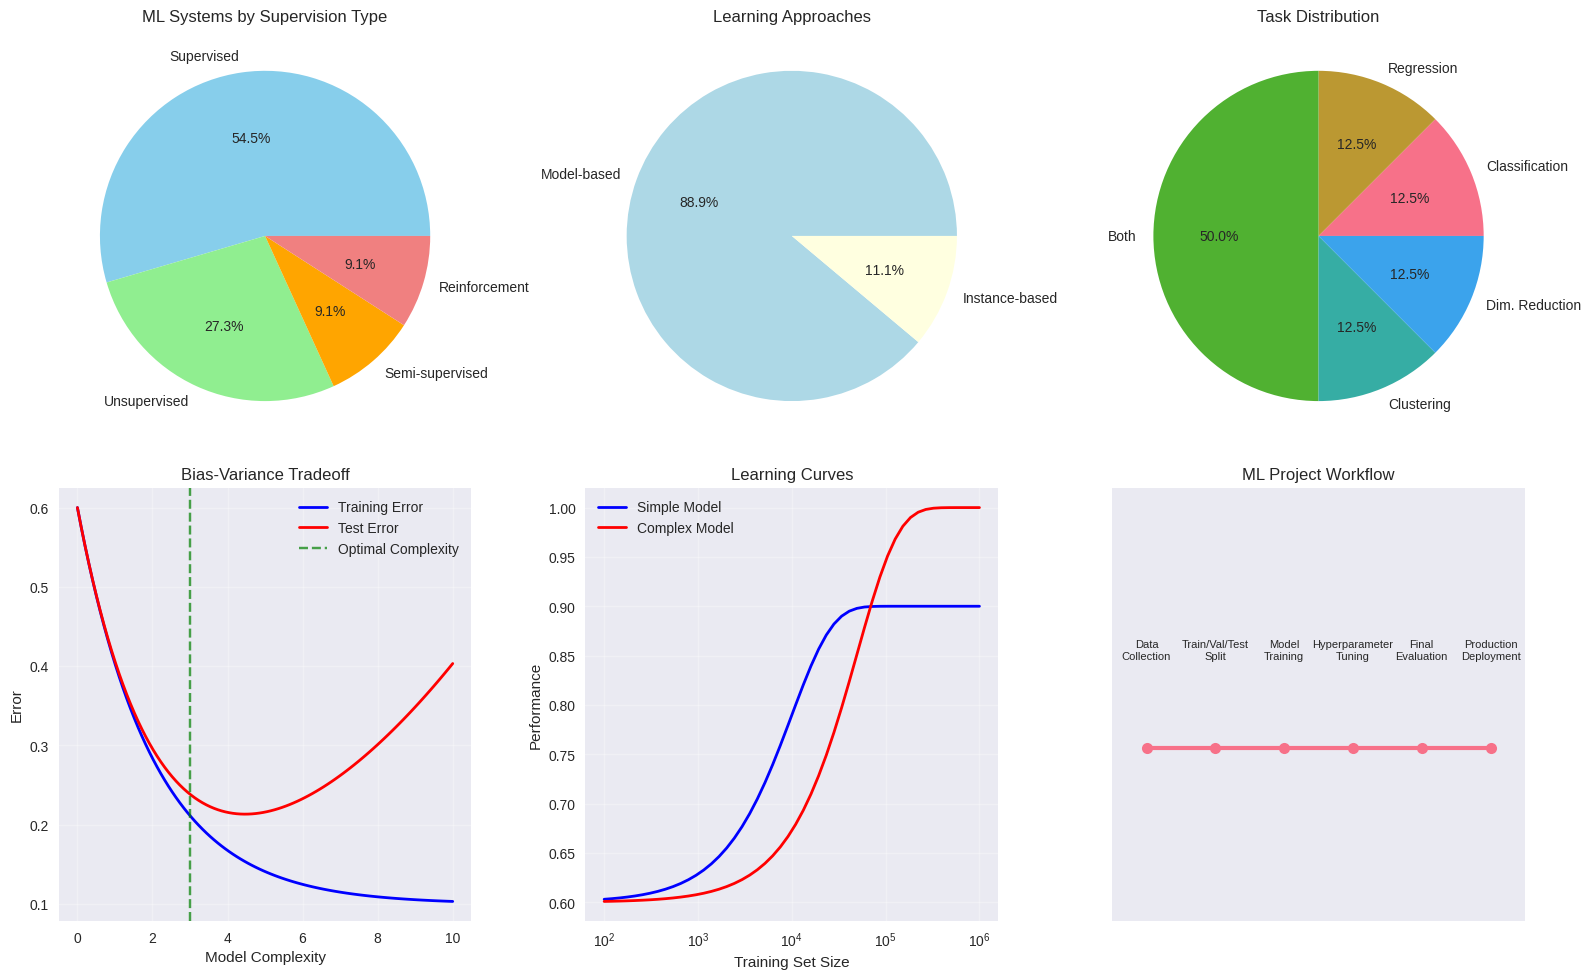


🧠 KEY INSIGHTS FROM CHAPTER 1:
  💡 Machine Learning is about making machines learn from data, not programming rules
  📊 Data quality and quantity often matter more than algorithm sophistication
  ⚖️ Balance between bias and variance is crucial for good generalization
  🔍 Always validate your model properly: Train/Validation/Test splits are essential
  🎯 No algorithm is universally best - choice depends on problem and data
  🛡️ Regularization is your friend against overfitting
  📈 More data often beats better algorithms (but both together are even better)
  🔬 Never tune hyperparameters on the test set - it invalidates your evaluation
  🎪 Feature engineering is often more important than algorithm selection
  📋 Start simple, then increase complexity gradually

🚀 READY FOR CHAPTER 2: END-TO-END ML PROJECT!

📚 This notebook covered:
   ✅ ML definitions and frameworks
   ✅ Types of ML systems
   ✅ Main challenges and solutions
   ✅ Validation and testing strategies
   ✅ All 19 chapter exerc

In [14]:
# Final comprehensive summary with interactive elements
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

print("🎓 MACHINE LEARNING LANDSCAPE - CHAPTER 1 COMPLETE")
print("=" * 60)

# Create a comprehensive algorithm comparison table
algorithms_data = {
    'Algorithm': ['Linear Regression', 'Logistic Regression', 'k-NN', 'Decision Tree',
                  'Random Forest', 'SVM', 'Neural Network', 'K-Means', 'PCA'],
    'Type': ['Supervised', 'Supervised', 'Supervised', 'Supervised',
             'Supervised', 'Supervised', 'Supervised', 'Unsupervised', 'Unsupervised'],
    'Task': ['Regression', 'Classification', 'Both', 'Both',
             'Both', 'Both', 'Both', 'Clustering', 'Dim. Reduction'],
    'Approach': ['Model-based', 'Model-based', 'Instance-based', 'Model-based',
                'Model-based', 'Model-based', 'Model-based', 'Model-based', 'Model-based'],
    'Interpretability': ['High', 'High', 'Medium', 'High',
                        'Medium', 'Low', 'Low', 'Medium', 'Medium'],
    'Training Speed': ['Fast', 'Fast', 'Fast', 'Fast',
                      'Medium', 'Medium', 'Slow', 'Fast', 'Fast'],
    'Prediction Speed': ['Fast', 'Fast', 'Slow', 'Fast',
                        'Fast', 'Fast', 'Fast', 'Fast', 'Fast'],
    'Handles Large Data': ['Yes', 'Yes', 'No', 'Yes',
                          'Yes', 'Medium', 'Yes', 'Yes', 'Yes']
}

df_algorithms = pd.DataFrame(algorithms_data)

print("\n📊 ML ALGORITHMS COMPARISON TABLE:")
print("=" * 40)
display(df_algorithms)

# Create a visual summary of ML challenges and solutions
challenges_solutions = {
    'Challenge': ['Insufficient Data', 'Nonrepresentative Data', 'Poor Quality Data',
                  'Irrelevant Features', 'Overfitting', 'Underfitting'],
    'Impact': ['High', 'High', 'Medium', 'Medium', 'High', 'Medium'],
    'Primary Solution': ['Data Collection', 'Better Sampling', 'Data Cleaning',
                        'Feature Engineering', 'Regularization', 'Model Complexity'],
    'Secondary Solution': ['Data Augmentation', 'Domain Adaptation', 'Outlier Removal',
                          'Feature Selection', 'More Data', 'Better Features']
}

df_challenges = pd.DataFrame(challenges_solutions)

print("\n⚠️ ML CHALLENGES AND SOLUTIONS:")
print("=" * 35)
display(df_challenges)

# Visualization of the complete ML workflow
plt.figure(figsize=(16, 10))

# Subplot 1: ML System Types
plt.subplot(2, 3, 1)
supervision_types = ['Supervised', 'Unsupervised', 'Semi-supervised', 'Reinforcement']
supervision_counts = [6, 3, 1, 1]  # From our algorithms table
colors_supervision = ['skyblue', 'lightgreen', 'orange', 'lightcoral']
plt.pie(supervision_counts, labels=supervision_types, colors=colors_supervision, autopct='%1.1f%%')
plt.title('ML Systems by Supervision Type')

# Subplot 2: Learning Approaches
plt.subplot(2, 3, 2)
approaches = ['Model-based', 'Instance-based']
approach_counts = [8, 1]  # From our algorithms table
plt.pie(approach_counts, labels=approaches, colors=['lightblue', 'lightyellow'], autopct='%1.1f%%')
plt.title('Learning Approaches')

# Subplot 3: Task Types
plt.subplot(2, 3, 3)
tasks = ['Classification', 'Regression', 'Both', 'Clustering', 'Dim. Reduction']
task_counts = [1, 1, 4, 1, 1]  # From our algorithms table
plt.pie(task_counts, labels=tasks, autopct='%1.1f%%')
plt.title('Task Distribution')

# Subplot 4: Model Complexity vs Performance Trade-off
plt.subplot(2, 3, 4)
complexity = np.linspace(0, 10, 100)
training_error = 0.5 * np.exp(-complexity/2) + 0.1
test_error = 0.5 * np.exp(-complexity/2) + 0.1 + 0.3 * (complexity/10)**2

plt.plot(complexity, training_error, 'b-', label='Training Error', linewidth=2)
plt.plot(complexity, test_error, 'r-', label='Test Error', linewidth=2)
plt.axvline(x=3, color='green', linestyle='--', alpha=0.7, label='Optimal Complexity')
plt.xlabel('Model Complexity')
plt.ylabel('Error')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 5: Data Size vs Algorithm Performance
plt.subplot(2, 3, 5)
data_sizes = np.logspace(2, 6, 50)  # 100 to 1M samples
simple_model = 0.9 - 0.3 * np.exp(-data_sizes/10000)
complex_model = 0.6 + 0.4 * (1 - np.exp(-data_sizes/50000))

plt.semilogx(data_sizes, simple_model, 'b-', label='Simple Model', linewidth=2)
plt.semilogx(data_sizes, complex_model, 'r-', label='Complex Model', linewidth=2)
plt.xlabel('Training Set Size')
plt.ylabel('Performance')
plt.title('Learning Curves')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 6: Validation Strategy Timeline
plt.subplot(2, 3, 6)
stages = ['Data\nCollection', 'Train/Val/Test\nSplit', 'Model\nTraining',
          'Hyperparameter\nTuning', 'Final\nEvaluation', 'Production\nDeployment']
timeline = range(len(stages))
plt.plot(timeline, [1]*len(timeline), 'o-', linewidth=3, markersize=8)
for i, stage in enumerate(stages):
    plt.text(i, 1.1, stage, ha='center', va='bottom', fontsize=8, rotation=0)
plt.ylim(0.8, 1.3)
plt.xlim(-0.5, len(stages)-0.5)
plt.title('ML Project Workflow')
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Final wisdom and best practices
print("\n🧠 KEY INSIGHTS FROM CHAPTER 1:")
print("=" * 40)
insights = [
    "💡 Machine Learning is about making machines learn from data, not programming rules",
    "📊 Data quality and quantity often matter more than algorithm sophistication",
    "⚖️ Balance between bias and variance is crucial for good generalization",
    "🔍 Always validate your model properly: Train/Validation/Test splits are essential",
    "🎯 No algorithm is universally best - choice depends on problem and data",
    "🛡️ Regularization is your friend against overfitting",
    "📈 More data often beats better algorithms (but both together are even better)",
    "🔬 Never tune hyperparameters on the test set - it invalidates your evaluation",
    "🎪 Feature engineering is often more important than algorithm selection",
    "📋 Start simple, then increase complexity gradually"
]

for insight in insights:
    print(f"  {insight}")

print("\n🚀 READY FOR CHAPTER 2: END-TO-END ML PROJECT!")
print("\n" + "="*60)
print("📚 This notebook covered:")
print("   ✅ ML definitions and frameworks")
print("   ✅ Types of ML systems")
print("   ✅ Main challenges and solutions")
print("   ✅ Validation and testing strategies")
print("   ✅ All 19 chapter exercises with detailed solutions")
print("   ✅ Mathematical foundations and formulas")
print("   ✅ Practical code implementations")
print("   ✅ No Free Lunch theorem demonstration")
print("\n🎯 Next: Apply these concepts in a real-world project!")

## 📚 Additional Resources and References

### 📖 Essential Reading
- **"Hands-On Machine Learning" by Aurélien Géron** (this book!)
- **"The Elements of Statistical Learning" by Hastie, Tibshirani & Friedman**
- **"Pattern Recognition and Machine Learning" by Christopher Bishop**
- **"Machine Learning: A Probabilistic Perspective" by Kevin Murphy**

### 🌐 Online Resources
- **Scikit-learn Documentation**: https://scikit-learn.org/
- **Coursera ML Course**: Andrew Ng's Machine Learning Course
- **Fast.ai**: Practical Deep Learning for Coders
- **Kaggle Learn**: Free micro-courses on ML topics

### 🔬 Research Papers Referenced
1. **Banko & Brill (2001)**: "Scaling to Very Very Large Corpora for Natural Language Disambiguation"
2. **Wolpert (1996)**: "The Lack of A Priori Distinctions Between Learning Algorithms" (No Free Lunch)
3. **Mitchell (1997)**: "Machine Learning" - Formal definition framework

### 🛠️ Tools and Libraries
- **Python**: Primary programming language for ML
- **Scikit-learn**: General-purpose ML library
- **Pandas**: Data manipulation and analysis
- **NumPy**: Numerical computing
- **Matplotlib/Seaborn**: Data visualization
- **Jupyter Notebooks**: Interactive development environment

### 🎓 Learning Path Suggestions

#### **Beginner → Intermediate:**
1. Master Chapter 1 concepts (you're here! ✅)
2. Complete Chapter 2 end-to-end project
3. Study supervised learning algorithms (Chapters 3-6)
4. Learn ensemble methods (Chapter 7)
5. Explore unsupervised learning (Chapters 8-9)

#### **Intermediate → Advanced:**
1. Deep learning fundamentals (Chapters 10-11)
2. Neural network architectures (Chapters 12-16)
3. Reinforcement learning (Chapter 18)
4. Production deployment (Chapter 19)
5. Specialized domains (computer vision, NLP)

### 💡 Practice Projects Ideas
- **Housing price prediction** (regression)
- **Email spam classification** (binary classification)
- **Handwritten digit recognition** (multi-class classification)
- **Customer segmentation** (clustering)
- **Movie recommendation system** (collaborative filtering)
- **Stock price forecasting** (time series)

---

**🎉 Congratulations on completing Chapter 1!**

You now have a solid foundation in machine learning concepts, from basic definitions to advanced validation strategies. The mathematical frameworks, practical code examples, and comprehensive exercise solutions in this notebook provide a complete reference for your ML journey.

**Remember**: Machine learning is both science and art. The science is in the mathematical foundations and rigorous evaluation methods you've learned. The art is in choosing the right approach for each unique problem you'll encounter.

**Ready to tackle your first end-to-end ML project? Let's move to Chapter 2! 🚀**